In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import matplotlib.patches as mpatches
import os
os.chdir("C:/Users/melkrewi/Desktop/shrimp/snRNAseq/z_inactivation/")

In [2]:
fran_gtf=pd.read_csv("merged_fran_adult_2.gtf",sep="\t",header=None)
fran_gtf_2=fran_gtf[[0,2,3,8]]
fran_gtf_2=fran_gtf_2[fran_gtf_2[2]=='transcript']
fran_gtf_2['gene_id']=fran_gtf_2[8].str.split(';',expand=True)[0]
fran_gtf_2=fran_gtf_2[[0,2,3,'gene_id']].drop_duplicates(subset='gene_id', keep="first")
fran_gtf_2['gene_id']=fran_gtf_2['gene_id'].str[9:-1]

In [349]:
average_expression=pd.read_csv("average_expression.txt",sep=" ")
merged=pd.merge(average_expression,fran_gtf_2,left_on='gene',right_on='gene_id')

<AxesSubplot:>

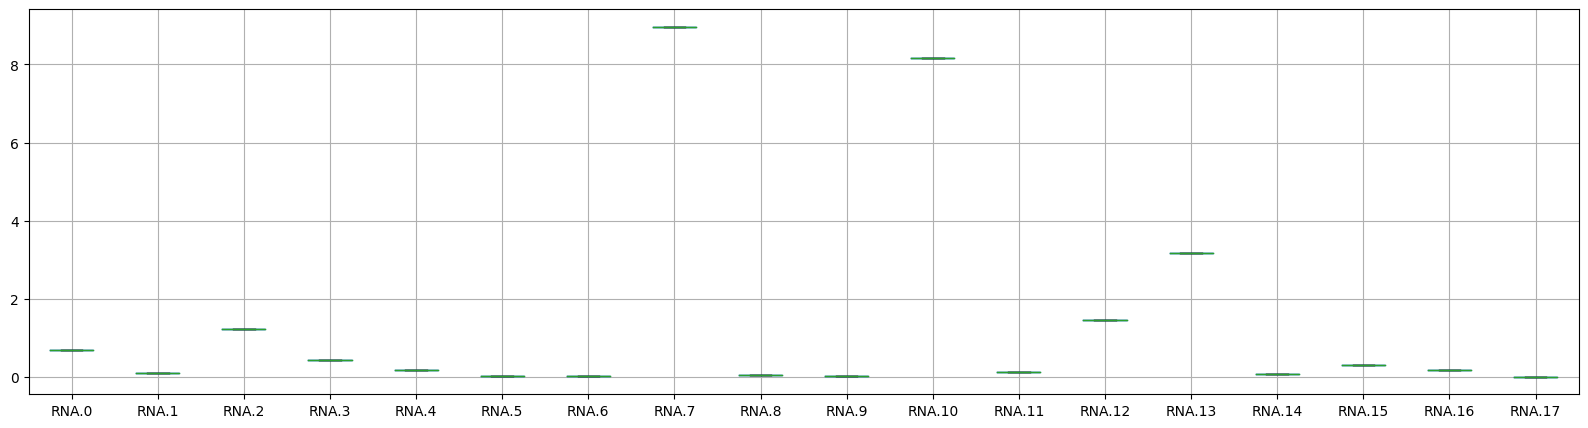

In [350]:
plt.figure(figsize=(20, 5))
average_expression[average_expression['gene']=='MSTRG.87'].boxplot()

In [5]:
merged_LG6=merged[merged[0]=='LG6'].drop(['gene_id',2,0],axis=1)

In [6]:
merged_LG6[merged_LG6.drop(['gene',3],axis=1).columns]=np.log2(merged_LG6[merged_LG6.drop(['gene',3],axis=1).columns]+1)

<AxesSubplot:xlabel='3'>

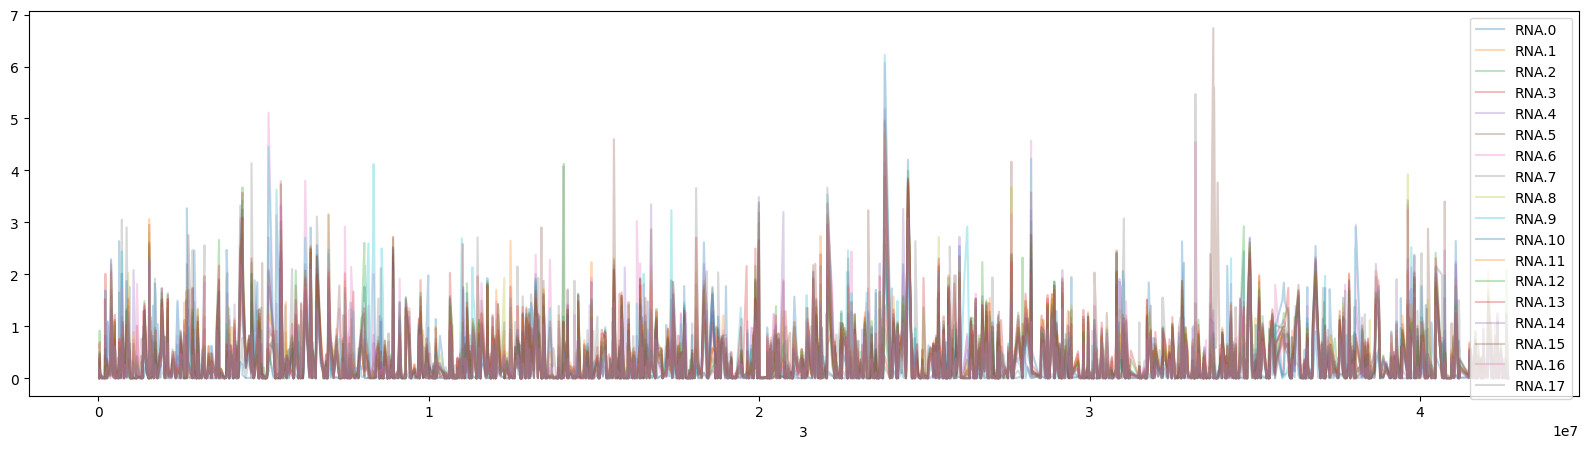

In [7]:
merged_LG6.plot(x=3, y=merged_LG6.drop(['gene',3],axis=1).columns,figsize=(20, 5),alpha=0.3)

In [ ]:
plt.figure(figsize=(20, 5))
x=plt.boxplot([merged_LG6['RNA.1'],merged_LG6['RNA.2'],merged_LG6['RNA.3'],merged_LG6['RNA.4'],merged_LG6['RNA.5'],merged_LG6['RNA.6'],merged_LG6['RNA.7_0'],merged_LG6['RNA.7_1'],merged_LG6['RNA.7_2'],merged_LG6['RNA.7_3'],merged_LG6['RNA.8'],merged_LG6['RNA.9'],merged_LG6['RNA.10'],merged_LG6['RNA.11'],merged_LG6['RNA.12'],merged_LG6['RNA.13'],merged_LG6['RNA.14'],merged_LG6['RNA.15'],merged_LG6['RNA.16']],showfliers=False)
#plt.scatter(merged_LG6[3],merged_LG6['RNA.10'],alpha=0.3)
#plt.scatter(merged_LG6[3],merged_LG6['RNA.1'],alpha=0.3)

In [132]:
merged_all=merged[merged[0].str.contains('LG')]

In [133]:
merged_all.loc[
  merged_all[0]!='LG6', 
  'strata'
] = 'Autosomal'
merged_all.loc[
  ((merged_all[0]=='LG6')&(merged_all[3]<=1.2*10**7)), 
  'strata'
] = 'pseudo'
merged_all.loc[
  ((merged_all[0]=='LG6')&(merged_all[3]>1.2*10**7)&(merged_all[3]<=3.2*10**7)), 
  'strata'
] = 'S1'
merged_all.loc[
  ((merged_all[0]=='LG6')&(merged_all[3]>3.2*10**7)), 
  'strata'
] = 'S0'

C:\Users\melkrewi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\melkrewi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [134]:
merged_all.loc[
  merged_all[0]!='LG6', 
  'identity'
] = 'Autosomal'
merged_all.loc[
  ((merged_all[0]=='LG6')), 
  'identity'
] = 'Z'

In [162]:
cluster_7_e=merged_all[['RNA.7',0,2,3,'gene_id','strata','identity']]#[merged_all['identity']=='Z'][]
cluster_10_e=merged_all[['RNA.10',0,2,3,'gene_id','strata','identity']]#[merged_all['identity']=='Z'][]
cluster_2_e=merged_all[['RNA.2',0,2,3,'gene_id','strata','identity']]#[merged_all['identity']=='Z'][]
cluster_3_e=merged_all[['RNA.3',0,2,3,'gene_id','strata','identity']]#[merged_all['identity']=='Z'][]

In [163]:
np.percentile(merged_all['RNA.10'], 45)

0.0035548530569689

In [164]:
cluster_7_e.loc[
  cluster_7_e['RNA.7']<=0, 
  'expression'
] = 'low'
cluster_7_e.loc[
  ((cluster_7_e['RNA.7']>0)), 
  'expression'
] = 'high'
cluster_10_e.loc[
  cluster_10_e['RNA.10']==0, 
  'expression'
] = 'low'
cluster_10_e.loc[
  ((cluster_10_e['RNA.10']>0)), 
  'expression'
] = 'high'
cluster_2_e.loc[
  cluster_2_e['RNA.2']==0, 
  'expression'
] = 'low'
cluster_2_e.loc[
  ((cluster_2_e['RNA.2']>0)), 
  'expression'
] = 'high'
cluster_3_e.loc[
  cluster_3_e['RNA.3']==0, 
  'expression'
] = 'low'
cluster_3_e.loc[
  ((cluster_3_e['RNA.3']>0)), 
  'expression'
] = 'high'

C:\Users\melkrewi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\melkrewi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [165]:
len(cluster_2_e[(cluster_2_e['identity']=='Z')&(cluster_2_e['expression']=='low')])/(len(cluster_2_e[(cluster_2_e['identity']=='Z')&(cluster_2_e['expression']=='high')])+len(cluster_2_e[(cluster_2_e['identity']=='Z')&(cluster_2_e['expression']=='low')]))

0.11994322214336409

In [166]:
len(cluster_2_e[(cluster_2_e['identity']=='Autosomal')&(cluster_2_e['expression']=='low')])/(len(cluster_2_e[(cluster_2_e['identity']=='Autosomal')&(cluster_2_e['expression']=='high')])+len(cluster_2_e[(cluster_2_e['identity']=='Autosomal')&(cluster_2_e['expression']=='low')]))

0.10433309126119583

In [167]:
len(cluster_10_e[(cluster_10_e['identity']=='Z')&(cluster_10_e['expression']=='low')])/(len(cluster_10_e[(cluster_10_e['identity']=='Z')&(cluster_10_e['expression']=='high')])+len(cluster_10_e[(cluster_10_e['identity']=='Z')&(cluster_10_e['expression']=='low')]))

0.44854506742370476

In [168]:
len(cluster_10_e[(cluster_10_e['identity']=='Autosomal')&(cluster_10_e['expression']=='low')])/(len(cluster_10_e[(cluster_10_e['identity']=='Autosomal')&(cluster_10_e['expression']=='high')])+len(cluster_10_e[(cluster_10_e['identity']=='Autosomal')&(cluster_10_e['expression']=='low')]))

0.4023844105543452

In [169]:
len(cluster_7_e[(cluster_7_e['identity']=='Z')&(cluster_7_e['expression']=='low')])/(len(cluster_7_e[(cluster_7_e['identity']=='Z')&(cluster_7_e['expression']=='high')])+len(cluster_7_e[(cluster_7_e['identity']=='Z')&(cluster_7_e['expression']=='low')]))

0.26472675656493966

In [170]:
len(cluster_7_e[(cluster_7_e['identity']=='Autosomal')&(cluster_7_e['expression']=='low')])/(len(cluster_7_e[(cluster_7_e['identity']=='Autosomal')&(cluster_7_e['expression']=='high')])+len(cluster_7_e[(cluster_7_e['identity']=='Autosomal')&(cluster_7_e['expression']=='low')]))

0.2247034616315662

In [141]:
len(cluster_7_e[(cluster_7_e['identity']=='Z')&(cluster_7_e['expression']=='low')])

373

In [142]:
len(cluster_7_e[(cluster_7_e['identity']=='Autosomal')&(cluster_7_e['expression']=='low')])

3713

<AxesSubplot:title={'center':'RNA.2'}, xlabel='[strata]'>

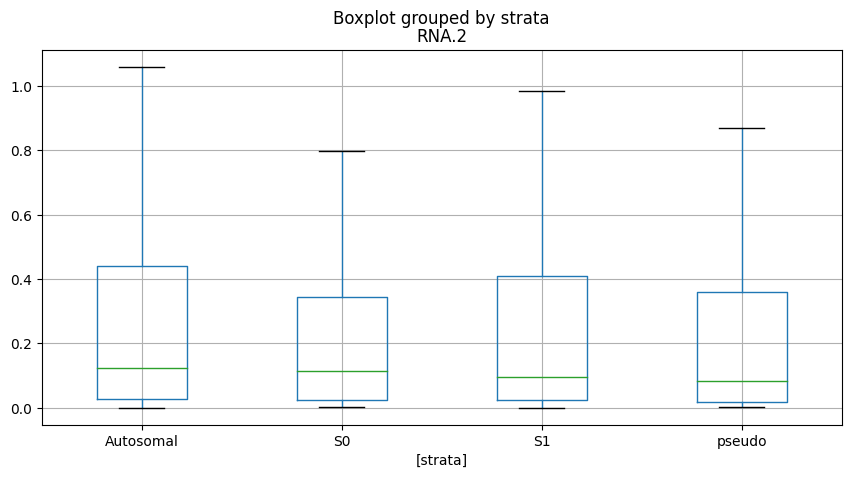

In [171]:
cluster_2_e[(cluster_2_e['expression']=='high')].boxplot(column=('RNA.2'), by=['strata'],figsize=(10, 5),showfliers=False)

<AxesSubplot:title={'center':'RNA.10'}, xlabel='[strata]'>

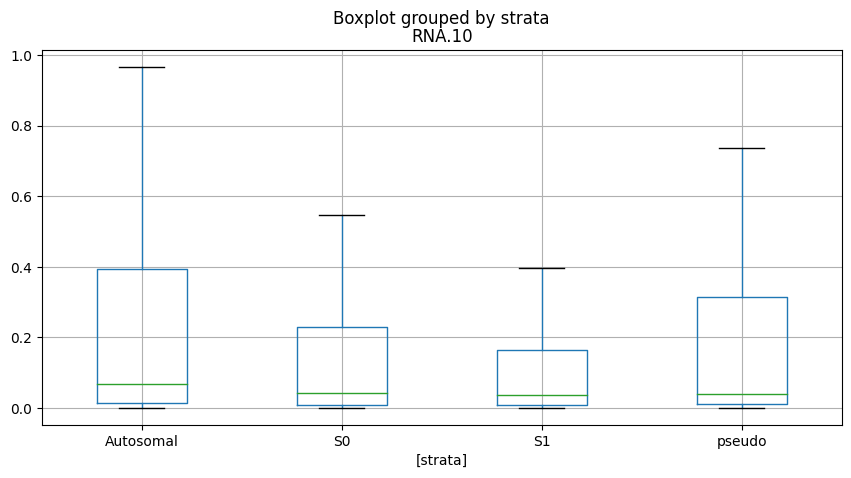

In [270]:
cluster_10_e[(cluster_10_e['expression']=='high')].boxplot(column=('RNA.10'), by=['strata'],figsize=(10, 5),showfliers=False)

<AxesSubplot:title={'center':'RNA.7'}, xlabel='[strata]'>

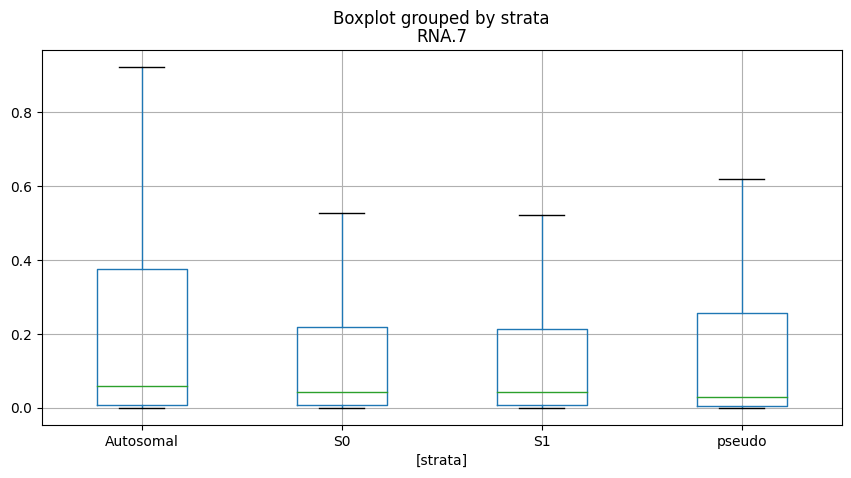

In [266]:
cluster_7_e[(cluster_7_e['expression']=='high')].boxplot(column=('RNA.7'), by=['strata'],figsize=(10, 5),showfliers=False)

In [271]:
np.median(cluster_10_e[(cluster_10_e['expression']=='high')&(cluster_10_e['identity']=='Z')]['RNA.10'])/np.median(cluster_10_e[(cluster_10_e['expression']=='high')&(cluster_10_e['identity']=='Autosomal')]['RNA.10'])

0.5676915793737621

In [272]:
np.median(cluster_7_e[(cluster_7_e['expression']=='high')&(cluster_7_e['identity']=='Z')]['RNA.7'])/np.median(cluster_7_e[(cluster_7_e['expression']=='high')&(cluster_7_e['identity']=='Autosomal')]['RNA.7'])

0.6833544096503084

In [176]:
np.median(cluster_2_e[(cluster_2_e['expression']=='high')&(cluster_2_e['identity']=='Z')]['RNA.2'])/np.median(cluster_2_e[(cluster_2_e['expression']=='high')&(cluster_2_e['identity']=='Autosomal')]['RNA.2'])

0.7863502045693893

In [178]:
np.median(cluster_3_e[(cluster_3_e['expression']=='high')&(cluster_3_e['identity']=='Z')]['RNA.3'])/np.median(cluster_3_e[(cluster_3_e['expression']=='high')&(cluster_3_e['identity']=='Autosomal')]['RNA.3'])

0.795007092927508

In [185]:
    np.median(cluster_10_e[(cluster_10_e['expression']=='high')&(cluster_10_e['strata']=='S1')]['RNA.10'])/np.median(cluster_10_e[(cluster_10_e['expression']=='high')&(cluster_10_e['strata']=='Autosomal')]['RNA.10'])

0.5346425775396157

In [15]:
merged_all[merged_all['identity']!='Z']

,gene,RNA.0,RNA.1,RNA.2,RNA.3,RNA.4,RNA.5,RNA.6,RNA.7,RNA.8,...,RNA.14,RNA.15,RNA.16,RNA.17,0,2,3,gene_id,strata,identity
6353,MSTRG.6359,0.000000,0.000810,0.002217,0.003057,0.000000,0.001569,0.000000,0.000000,0.001456,...,0.000000,0.000000,0.000000,0.000000,LG1,transcript,54555,MSTRG.6359,Autosomal,Autosomal
6354,MSTRG.6360,0.004407,0.016236,0.024369,0.047911,0.051530,0.027232,0.023558,0.005256,0.007624,...,0.021309,0.022504,0.000000,0.000000,LG1,transcript,107418,MSTRG.6360,Autosomal,Autosomal
6355,MSTRG.6361,0.027207,0.009572,0.111434,0.037330,0.057477,0.019304,0.013694,0.000209,0.024251,...,0.006199,0.022012,0.019464,0.000000,LG1,transcript,108663,MSTRG.6361,Autosomal,Autosomal
6356,MSTRG.6362,0.000000,0.025126,0.012157,0.051888,0.015139,0.019645,0.043335,0.005980,0.029351,...,0.035063,0.018476,0.032413,0.000000,LG1,transcript,111250,MSTRG.6362,Autosomal,Autosomal
6357,MSTRG.6363,0.119033,0.278206,0.210242,0.319456,0.229009,0.288457,0.241944,0.004038,0.209274,...,0.204036,0.132090,0.356647,0.432162,LG1,transcript,119583,MSTRG.6363,Autosomal,Autosomal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24281,MSTRG.24293,0.077700,0.055352,0.047801,0.050965,0.063473,0.043395,0.044200,0.007939,0.068213,...,0.048619,0.021119,0.006099,0.019355,LG9,transcript,17103920,MSTRG.24293,Autosomal,Autosomal
24282,MSTRG.24294,0.016972,0.116531,0.201605,0.243268,0.136120,0.087641,0.189186,0.117820,0.087154,...,0.152713,0.098257,0.109071,0.019827,LG9,transcript,17123633,MSTRG.24294,Autosomal,Autosomal
24283,MSTRG.24295,2.411024,1.372457,3.021813,1.658809,1.939488,1.192160,1.095996,1.705443,1.604412,...,1.042636,0.979539,1.016084,0.964413,LG9,transcript,17135466,MSTRG.24295,Autosomal,Autosomal
24284,MSTRG.24296,0.055309,0.026150,0.073749,0.039305,0.033787,0.047323,0.033842,0.000000,0.027621,...,0.009743,0.144869,0.020630,0.000000,LG9,transcript,17143624,MSTRG.24296,Autosomal,Autosomal


In [112]:
merged_all_for_TRAPID=merged_all
merged_all_for_TRAPID['gene']=merged_all_for_TRAPID['gene']+'.1'
merged_all_for_TRAPID[merged_all_for_TRAPID['strata']=='S0']['gene'].to_csv('S0_transcripts_for_TRAPID.txt',sep='\t',index=False)

C:\Users\melkrewi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [115]:
merged_all_for_TRAPID[merged_all_for_TRAPID['strata']=='pseudo']

,gene,RNA.0,RNA.1,RNA.10,RNA.11,RNA.12,RNA.13,RNA.14,RNA.15,RNA.16,...,RNA.7_2,RNA.7_3,RNA.8,RNA.9,0,2,3,gene_id,strata,identity
20652,MSTRG.20663.1.1,0.034425,0.028960,0.048067,0.000000,0.101830,0.073257,0.003473,0.037509,0.000000,...,0.000000,0.021132,0.004977,0.011613,LG6,transcript,19870,MSTRG.20663,pseudo,Z
20653,MSTRG.20664.1.1,0.000000,0.007845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.024017,0.000000,0.000000,0.026773,LG6,transcript,27654,MSTRG.20664,pseudo,Z
20654,MSTRG.20665.1.1,0.006867,0.001832,0.010807,0.020885,0.026579,0.021684,0.000000,0.000000,0.000000,...,0.000219,0.000000,0.000000,0.000000,LG6,transcript,34778,MSTRG.20665,pseudo,Z
20655,MSTRG.20666.1.1,0.074235,0.023334,0.002906,0.000000,0.125478,0.041797,0.002549,0.000000,0.000000,...,0.008367,0.000000,0.043760,0.009453,LG6,transcript,35529,MSTRG.20666,pseudo,Z
20656,MSTRG.20667.1.1,0.270252,0.133015,0.029491,0.000000,0.189475,0.595681,0.030820,0.017657,0.000000,...,0.000000,0.000000,0.019178,0.000000,LG6,transcript,37049,MSTRG.20667,pseudo,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21041,MSTRG.21052.1.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007485,0.000000,0.000000,0.000000,LG6,transcript,11864143,MSTRG.21052,pseudo,Z
21042,MSTRG.21053.1.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,LG6,transcript,11889828,MSTRG.21053,pseudo,Z
21043,MSTRG.21054.1.1,0.502183,0.969674,0.787061,0.277332,0.713979,1.271786,0.631651,0.438489,0.759455,...,1.936145,0.586352,0.547662,0.431927,LG6,transcript,11929023,MSTRG.21054,pseudo,Z
21044,MSTRG.21055.1.1,0.000000,0.017535,0.000000,0.032055,0.000000,0.000000,0.003295,0.000000,0.000000,...,0.914179,0.353971,0.000000,0.004646,LG6,transcript,11963589,MSTRG.21055,pseudo,Z


In [255]:
merged_all.columns#[['gene','RNA_7_0','RNA_7_1','RNA_7_2','RNA_7_3','RNA_11','RNA.10','RNA.16',0,'identity','strata']]

Index([    'gene',    'RNA.0',    'RNA.1',    'RNA.2',    'RNA.3',    'RNA.4',
          'RNA.5',    'RNA.6',    'RNA.7',    'RNA.8',    'RNA.9',   'RNA.10',
         'RNA.11',   'RNA.12',   'RNA.13',   'RNA.14',   'RNA.15',   'RNA.16',
         'RNA.17',   'RNA.18',   'RNA.19',   'RNA.20',   'RNA.21',   'RNA.22',
         'RNA.23',   'RNA.24',   'RNA.25',   'RNA.26',   'RNA.27',   'RNA.28',
         'RNA.29',   'RNA.30',   'RNA.31',          0,          2,          3,
        'gene_id',   'strata', 'identity'],
      dtype='object')

array([[<AxesSubplot:title={'center':'RNA.7'}, xlabel='[strata]'>,
        <AxesSubplot:title={'center':'RNA.10'}, xlabel='[strata]'>,
        <AxesSubplot:title={'center':'RNA.11'}, xlabel='[strata]'>],
       [<AxesSubplot:title={'center':'RNA.14'}, xlabel='[strata]'>,
        <AxesSubplot:title={'center':'RNA.4'}, xlabel='[strata]'>,
        <AxesSubplot:title={'center':'RNA.9'}, xlabel='[strata]'>],
       [<AxesSubplot:title={'center':'RNA.5'}, xlabel='[strata]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

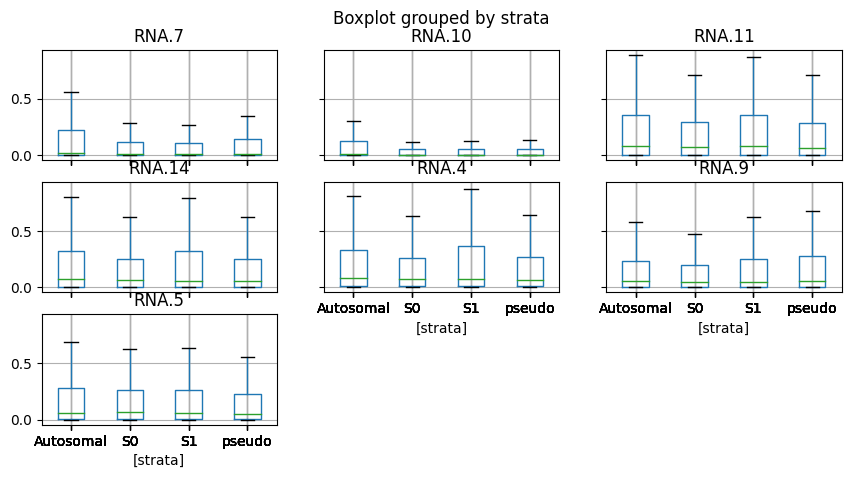

In [70]:
merged_all.boxplot(column=('RNA.7','RNA.10','RNA.11','RNA.14','RNA.4','RNA.9','RNA.5'), by=['strata'],figsize=(10, 5),showfliers=False)

array([[<AxesSubplot:title={'center':'RNA.20'}, xlabel='[strata]'>,
        <AxesSubplot:title={'center':'RNA.10'}, xlabel='[strata]'>,
        <AxesSubplot:title={'center':'RNA.11'}, xlabel='[strata]'>],
       [<AxesSubplot:title={'center':'RNA.14'}, xlabel='[strata]'>,
        <AxesSubplot:title={'center':'RNA.26'}, xlabel='[strata]'>,
        <AxesSubplot:title={'center':'RNA.4'}, xlabel='[strata]'>],
       [<AxesSubplot:title={'center':'RNA.9'}, xlabel='[strata]'>,
        <AxesSubplot:title={'center':'RNA.5'}, xlabel='[strata]'>,
        <AxesSubplot:>]], dtype=object)

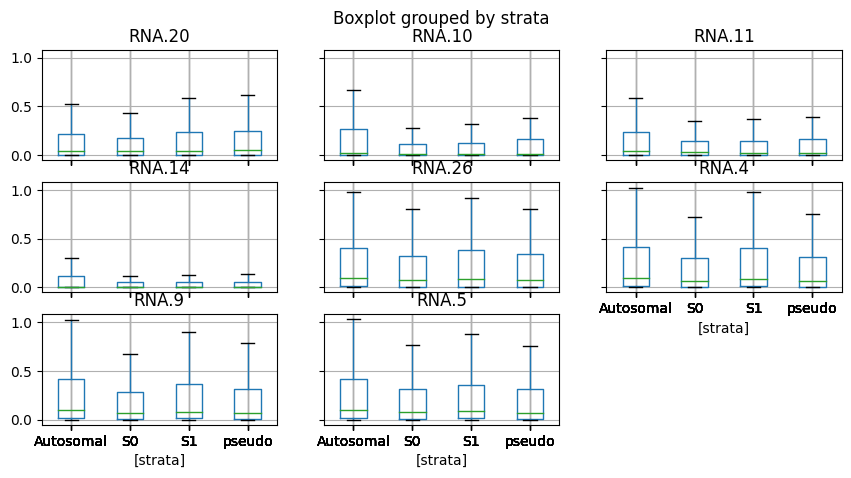

In [258]:
merged_all.boxplot(column=('RNA.20','RNA.10','RNA.11','RNA.14','RNA.26','RNA.4','RNA.9','RNA.5'), by=['strata'],figsize=(10, 5),showfliers=False)

In [24]:
from scipy.stats import ranksums
print(ranksums(merged_all[merged_all['strata']=='S0']['RNA.7'],merged_all[merged_all['strata']=='Autosomal']['RNA.7'],alternative='two-sided'))

RanksumsResult(statistic=-2.0537171391734153, pvalue=0.04000307672995824)


In [365]:
print(ranksums(merged_all[merged_all['strata']=='S0']['RNA.10'],merged_all[merged_all['strata']=='Autosomal']['RNA.10'],alternative='two-sided'))

RanksumsResult(statistic=-2.5242944450376554, pvalue=0.011593078150821307)


(array([1.326e+03, 4.800e+01, 1.900e+01, 7.000e+00, 3.000e+00, 4.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.86584328, 1.73168656, 2.59752984, 3.46337312,
        4.3292164 , 5.19505968, 6.06090296, 6.92674625, 7.79258953,
        8.65843281]),
 <a list of 10 Patch objects>)

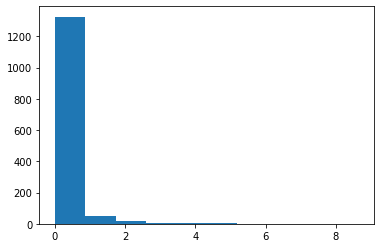

In [328]:
#plt.hist(merged_Z['RNA.7'])
plt.hist(merged_Z['RNA.10'])
#plt.hist(merged_Z['RNA.9'])

In [57]:
merged_autosomal=merged_all[merged_all['identity']=='Autosomal']
merged_Z=merged_all[merged_all['identity']=='Z']
merged_autosomal_s=merged_all[merged_all['strata']=='Autosomal']
merged_Z_S0=merged_all[merged_all['strata']=='S0']
merged_Z_S1=merged_all[merged_all['strata']=='S1']
merged_Z_pseudo=merged_all[merged_all['strata']=='pseudo']

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

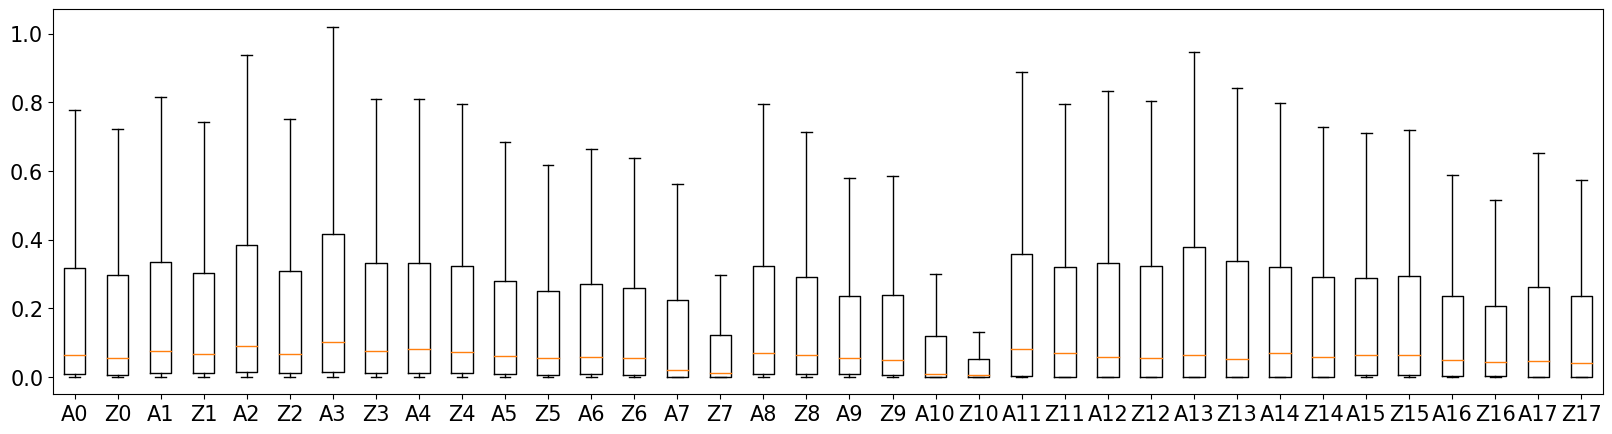

In [58]:
plt.figure(figsize=(20, 5))

x=plt.boxplot([merged_autosomal['RNA.0'],merged_Z['RNA.0'],merged_autosomal['RNA.1'],merged_Z['RNA.1'],merged_autosomal['RNA.2'],merged_Z['RNA.2'],merged_autosomal['RNA.3'],merged_Z['RNA.3'],merged_autosomal['RNA.4'],merged_Z['RNA.4'],merged_autosomal['RNA.5'],merged_Z['RNA.5'],merged_autosomal['RNA.6'],merged_Z['RNA.6'],merged_autosomal['RNA.7'],merged_Z['RNA.7'],merged_autosomal['RNA.8'],merged_Z['RNA.8'],merged_autosomal['RNA.9'],merged_Z['RNA.9'],merged_autosomal['RNA.10'],merged_Z['RNA.10'],merged_autosomal['RNA.11'],merged_Z['RNA.11'],merged_autosomal['RNA.12'],merged_Z['RNA.12'],merged_autosomal['RNA.13'],merged_Z['RNA.13'],merged_autosomal['RNA.14'],merged_Z['RNA.14'],merged_autosomal['RNA.15'],merged_Z['RNA.15'],merged_autosomal['RNA.16'],merged_Z['RNA.16'],merged_autosomal['RNA.17'],merged_Z['RNA.17']],showfliers=False)
region = ['A0','Z0','A1','Z1','A2','Z2','A3','Z3','A4','Z4','A5','Z5','A6','Z6','A7','Z7','A8','Z8','A9','Z9','A10','Z10','A11','Z11','A12','Z12','A13','Z13','A14','Z14','A15','Z15','A16','Z16','A17','Z17']
plt.xticks(np.arange(1,37), region)
heights = [0, 0, 2.3, 2.7, 2.25]
bars = np.arange(len(heights))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [283]:
print(ranksums(merged_autosomal['RNA.10'],merged_Z['RNA.10'],alternative='two-sided'))

RanksumsResult(statistic=5.233746407716981, pvalue=1.66108311990577e-07)


In [126]:
(statistics.median(merged_Z['RNA.11'])/statistics.median(merged_autosomal['RNA.11']))

0.08832383652538431

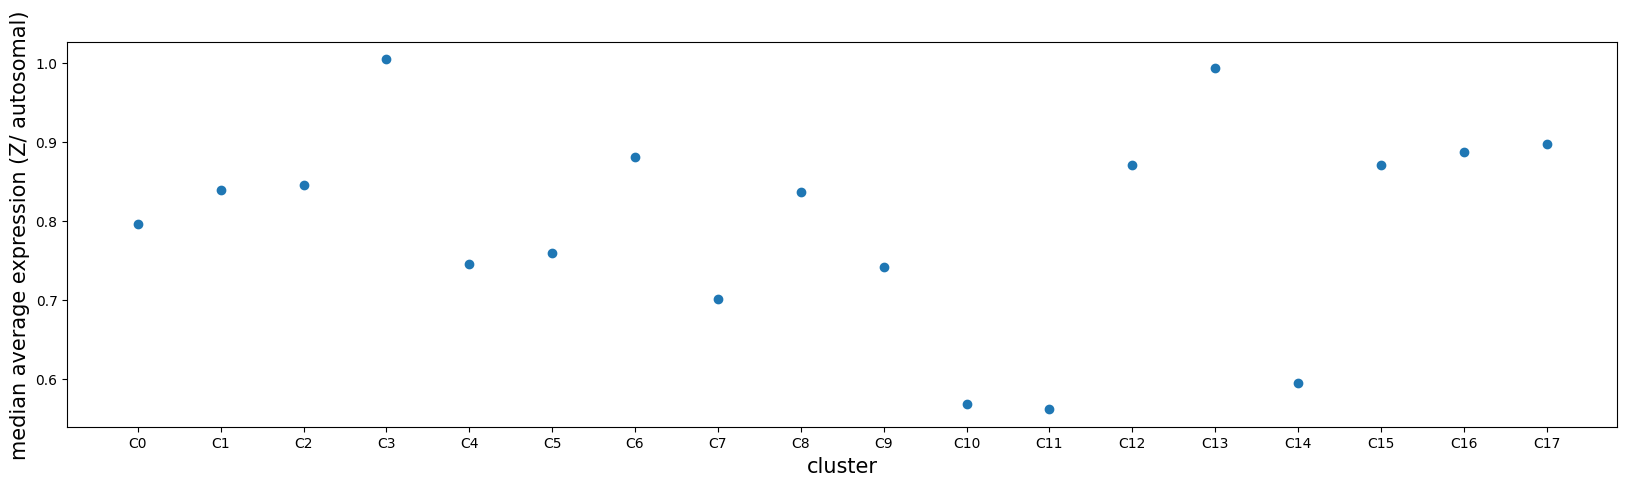

In [261]:
import statistics
plt.figure(figsize=(20, 5))
plt.scatter(np.arange(1,19),[(statistics.median(merged_Z['RNA.0'])/statistics.median(merged_autosomal['RNA.0'])),(statistics.median(merged_Z['RNA.1'])/statistics.median(merged_autosomal['RNA.1'])),(statistics.median(merged_Z['RNA.2'])/statistics.median(merged_autosomal['RNA.2'])),(statistics.median(merged_Z['RNA.3'])/statistics.median(merged_autosomal['RNA.3'])),(statistics.median(merged_Z['RNA.4'])/statistics.median(merged_autosomal['RNA.4'])),(statistics.median(merged_Z['RNA.5'])/statistics.median(merged_autosomal['RNA.5'])),(statistics.median(merged_Z['RNA.6'])/statistics.median(merged_autosomal['RNA.6'])),(statistics.median(merged_Z['RNA.7'])/statistics.median(merged_autosomal['RNA.7'])),(statistics.median(merged_Z['RNA.8'])/statistics.median(merged_autosomal['RNA.8'])),(statistics.median(merged_Z['RNA.9'])/statistics.median(merged_autosomal['RNA.9'])),(statistics.median(merged_Z['RNA.10'])/statistics.median(merged_autosomal['RNA.10'])),(statistics.median(merged_Z['RNA.11'])/statistics.median(merged_autosomal['RNA.11'])),(statistics.median(merged_Z['RNA.12'])/statistics.median(merged_autosomal['RNA.12'])),(statistics.median(merged_Z['RNA.13'])/statistics.median(merged_autosomal['RNA.13'])),(statistics.median(merged_Z['RNA.14'])/statistics.median(merged_autosomal['RNA.14'])),(statistics.median(merged_Z['RNA.15'])/statistics.median(merged_autosomal['RNA.15'])),(statistics.median(merged_Z['RNA.16'])/statistics.median(merged_autosomal['RNA.16'])),(statistics.median(merged_Z['RNA.17'])/statistics.median(merged_autosomal['RNA.17']))])
region = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','C15','C16','C17']
plt.xticks(np.arange(1,19), region)
plt.ylabel('median average expression (Z/ autosomal)',fontsize=15)
plt.xlabel('cluster',fontsize=15)
heights = [0, 0, 2.3, 2.7, 2.25]
plt.savefig('Z_vs_autosomal.png',bbox_inches='tight')

In [63]:
(np.mean(merged_Z['RNA.10'])/np.mean(merged_autosomal['RNA.10']))

NameError: name 'merged_Z' is not defined

In [ ]:
plt.figure(figsize=(40, 10))

x=plt.boxplot([merged_autosomal_s['RNA.0'],merged_Z_pseudo['RNA.0'],merged_Z_S1['RNA.0'],merged_Z_S0['RNA.0'],merged_autosomal_s['RNA.1'],merged_Z_pseudo['RNA.1'],merged_Z_S1['RNA.1'],merged_Z_S0['RNA.1'],merged_autosomal_s['RNA.2'],merged_Z_pseudo['RNA.2'],merged_Z_S1['RNA.2'],merged_Z_S0['RNA.2'],merged_autosomal_s['RNA.3'],merged_Z_pseudo['RNA.3'],merged_Z_S1['RNA.3'],merged_Z_S0['RNA.3'],merged_autosomal_s['RNA.4'],merged_Z_pseudo['RNA.4'],merged_Z_S1['RNA.4'],merged_Z_S0['RNA.4'],merged_autosomal_s['RNA.5'],merged_Z_pseudo['RNA.5'],merged_Z_S1['RNA.5'],merged_Z_S0['RNA.5'],merged_autosomal_s['RNA.6'],merged_Z_pseudo['RNA.6'],merged_Z_S1['RNA.6'],merged_Z_S0['RNA.6'],merged_autosomal_s['RNA.7_0'],merged_Z_pseudo['RNA.7_0'],merged_Z_S1['RNA.7_0'],merged_Z_S0['RNA.7_0'],merged_autosomal_s['RNA.7_1'],merged_Z_pseudo['RNA.7_1'],merged_Z_S1['RNA.7_1'],merged_Z_S0['RNA.7_1'],merged_autosomal_s['RNA.7_2'],merged_Z_pseudo['RNA.7_2'],merged_Z_S1['RNA.7_2'],merged_Z_S0['RNA.7_2'],merged_autosomal_s['RNA.7_3'],merged_Z_pseudo['RNA.7_3'],merged_Z_S1['RNA.7_3'],merged_Z_S0['RNA.7_3'],merged_autosomal_s['RNA.8'],merged_Z_pseudo['RNA.8'],merged_Z_S1['RNA.8'],merged_Z_S0['RNA.8'],merged_autosomal_s['RNA.9'],merged_Z_pseudo['RNA.9'],merged_Z_S1['RNA.9'],merged_Z_S0['RNA.9'],merged_autosomal_s['RNA.10'],merged_Z_pseudo['RNA.10'],merged_Z_S1['RNA.10'],merged_Z_S0['RNA.10'],merged_autosomal_s['RNA.11'],merged_Z_pseudo['RNA.11'],merged_Z_S1['RNA.11'],merged_Z_S0['RNA.11'],merged_autosomal_s['RNA.12'],merged_Z_pseudo['RNA.12'],merged_Z_S1['RNA.12'],merged_Z_S0['RNA.12'],merged_autosomal_s['RNA.13'],merged_Z_pseudo['RNA.13'],merged_Z_S1['RNA.13'],merged_Z_S0['RNA.13'],merged_autosomal_s['RNA.14'],merged_Z_pseudo['RNA.14'],merged_Z_S1['RNA.14'],merged_Z_S0['RNA.14'],merged_autosomal_s['RNA.15'],merged_Z_pseudo['RNA.15'],merged_Z_S1['RNA.15'],merged_Z_S0['RNA.15'],merged_autosomal_s['RNA.16'],merged_Z_pseudo['RNA.16'],merged_Z_S1['RNA.16'],merged_Z_S0['RNA.16']],showfliers=False)
region = ['A0','pseudo','S1','S0','A1','pseudo','S1','S0','A2','pseudo','S1','S0','A3','pseudo','S1','S0','A4','pseudo','S1','S0','A5','pseudo','S1','S0','A6','pseudo','S1','S0','A7','pseudo','S1','S0','A8','pseudo','S1','S0','A9','pseudo','S1','S0','A10','pseudo','S1','S0','A11','pseudo','S1','S0','A12','pseudo','S1','S0','A13','pseudo','S1','S0','A14','pseudo','S1','S0','A15','pseudo','S1','S0','A16','pseudo','S1','S0','A17','pseudo','S1','S0']
y=plt.xticks(np.arange(1,18*4+1), region)
#heights = [0, 0, 2.3, 2.7, 2.25]
#bars = np.arange(len(heights))
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)

In [128]:
dict(facecolor=c, color=c)

{'facecolor': 'black', 'color': 'black'}

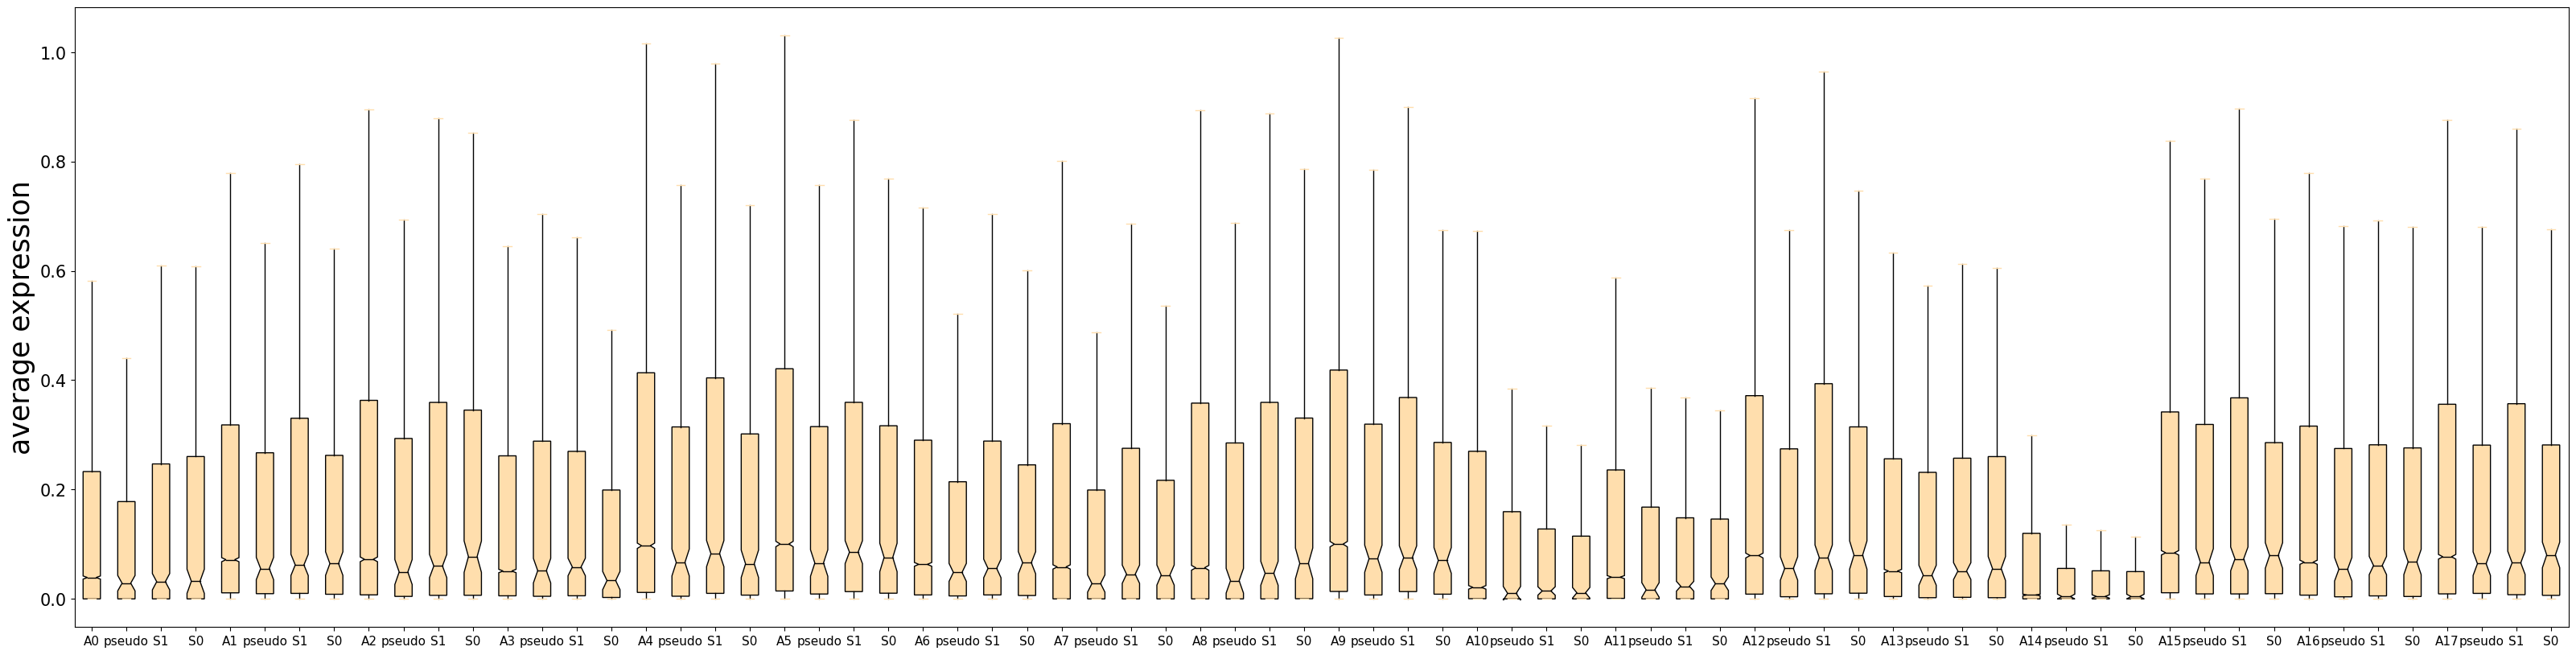

In [263]:
plt.figure(figsize=(40, 10))
c='black'
d='navajowhite'
x=plt.boxplot([merged_autosomal_s['RNA.0'],merged_Z_pseudo['RNA.0'],merged_Z_S1['RNA.0'],merged_Z_S0['RNA.0'],merged_autosomal_s['RNA.1'],merged_Z_pseudo['RNA.1'],merged_Z_S1['RNA.1'],merged_Z_S0['RNA.1'],merged_autosomal_s['RNA.2'],merged_Z_pseudo['RNA.2'],merged_Z_S1['RNA.2'],merged_Z_S0['RNA.2'],merged_autosomal_s['RNA.3'],merged_Z_pseudo['RNA.3'],merged_Z_S1['RNA.3'],merged_Z_S0['RNA.3'],merged_autosomal_s['RNA.4'],merged_Z_pseudo['RNA.4'],merged_Z_S1['RNA.4'],merged_Z_S0['RNA.4'],merged_autosomal_s['RNA.5'],merged_Z_pseudo['RNA.5'],merged_Z_S1['RNA.5'],merged_Z_S0['RNA.5'],merged_autosomal_s['RNA.6'],merged_Z_pseudo['RNA.6'],merged_Z_S1['RNA.6'],merged_Z_S0['RNA.6'],merged_autosomal_s['RNA.7'],merged_Z_pseudo['RNA.7'],merged_Z_S1['RNA.7'],merged_Z_S0['RNA.7'],merged_autosomal_s['RNA.8'],merged_Z_pseudo['RNA.8'],merged_Z_S1['RNA.8'],merged_Z_S0['RNA.8'],merged_autosomal_s['RNA.9'],merged_Z_pseudo['RNA.9'],merged_Z_S1['RNA.9'],merged_Z_S0['RNA.9'],merged_autosomal_s['RNA.10'],merged_Z_pseudo['RNA.10'],merged_Z_S1['RNA.10'],merged_Z_S0['RNA.10'],merged_autosomal_s['RNA.11'],merged_Z_pseudo['RNA.11'],merged_Z_S1['RNA.11'],merged_Z_S0['RNA.11'],merged_autosomal_s['RNA.12'],merged_Z_pseudo['RNA.12'],merged_Z_S1['RNA.12'],merged_Z_S0['RNA.12'],merged_autosomal_s['RNA.13'],merged_Z_pseudo['RNA.13'],merged_Z_S1['RNA.13'],merged_Z_S0['RNA.13'],merged_autosomal_s['RNA.14'],merged_Z_pseudo['RNA.14'],merged_Z_S1['RNA.14'],merged_Z_S0['RNA.14'],merged_autosomal_s['RNA.15'],merged_Z_pseudo['RNA.15'],merged_Z_S1['RNA.15'],merged_Z_S0['RNA.15'],merged_autosomal_s['RNA.16'],merged_Z_pseudo['RNA.16'],merged_Z_S1['RNA.16'],merged_Z_S0['RNA.16'],merged_autosomal_s['RNA.17'],merged_Z_pseudo['RNA.17'],merged_Z_S1['RNA.17'],merged_Z_S0['RNA.17']],showfliers=False,notch=True, patch_artist=True,
            boxprops=dict(facecolor=d, color=c),medianprops=dict(color=c),whiskerprops=dict(color=c),capprops=dict(color=d))
region = ['A0','pseudo','S1','S0','A1','pseudo','S1','S0','A2','pseudo','S1','S0','A3','pseudo','S1','S0','A4','pseudo','S1','S0','A5','pseudo','S1','S0','A6','pseudo','S1','S0','A7','pseudo','S1','S0','A8','pseudo','S1','S0','A9','pseudo','S1','S0','A10','pseudo','S1','S0','A11','pseudo','S1','S0','A12','pseudo','S1','S0','A13','pseudo','S1','S0','A14','pseudo','S1','S0','A15','pseudo','S1','S0','A16','pseudo','S1','S0','A17','pseudo','S1','S0']
y=plt.xticks(np.arange(1,18*4+1), region)
plt.ylabel('average expression',fontsize=25)
#heights = [0, 0, 2.3, 2.7, 2.25]
#bars = np.arange(len(heights))
plt.xticks(fontsize=11)
plt.yticks(fontsize=15)
plt.savefig('Z_strata_expression.png',bbox_inches='tight')

In [266]:
nauplii_expression=pd.read_csv("Expression_fran_naupli_25_11_2022.txt",sep=",")
nauplii_expression['target_id']=nauplii_expression['target_id'].str[:-2]
nauplii_expression['sum']=nauplii_expression.sum(axis=1,numeric_only = True)
average_expression['sum_c']=average_expression.sum(axis=1,numeric_only = True)
cyst_expression=pd.read_csv("Expression_cysts_25_11_2022.txt",sep=",")
cyst_expression['target_id']=cyst_expression['target_id'].str[:-2]


In [267]:
cysts_chr=pd.merge(cyst_expression,fran_gtf_2,left_on='target_id',right_on='gene_id')

In [268]:
cysts_LG6=cysts_chr[cysts_chr[0]=='LG6']
cysts_chr.loc[
  cysts_chr[0]!='LG6', 
  'identity'
] = 'Autosomal'
cysts_chr.loc[
  ((cysts_chr[0]=='LG6')), 
  'identity'
] = 'Z'

In [269]:
cysts_chr.loc[
  cysts_chr[0]!='LG6', 
  'strata'
] = 'Autosomal'
cysts_chr.loc[
  ((cysts_chr[0]=='LG6')&(cysts_chr[3]<=2.5*10**7)), 
  'strata'
] = 'pseudo'
cysts_chr.loc[
  ((cysts_chr[0]=='LG6')&(cysts_chr[3]>2.5*10**7)&(cysts_chr[3]<=3.8*10**7)), 
  'strata'
] = 'S1'
cysts_chr.loc[
  ((cysts_chr[0]=='LG6')&(cysts_chr[3]>3.8*10**7)), 
  'strata'
] = 'S0'

In [33]:
statistics.median(cysts_chr[cysts_chr['strata']=='pseudo']['tpm.x'])

1.54915

array([<AxesSubplot:title={'center':'tpm.x'}, xlabel='[identity]'>,
       <AxesSubplot:title={'center':'tpm.y'}, xlabel='[identity]'>],
      dtype=object)

<Figure size 1000x500 with 0 Axes>

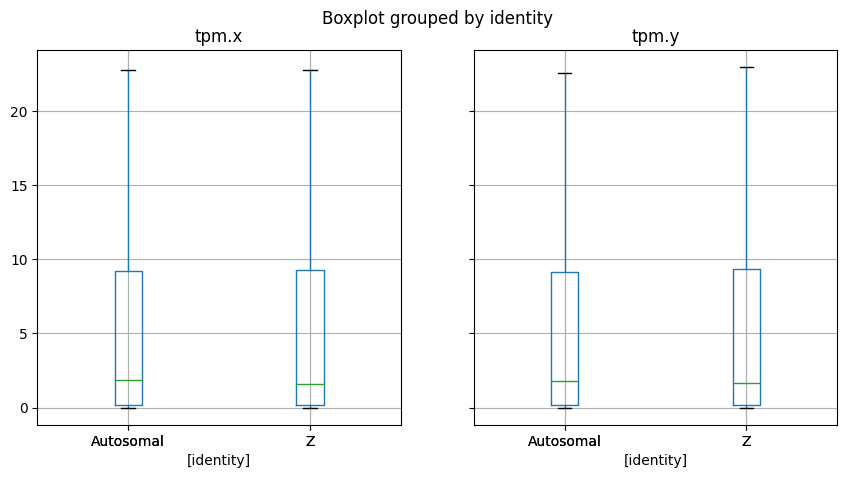

In [34]:
fig = plt.figure(figsize=(10,5))
cysts_chr.boxplot(column=['tpm.x', 'tpm.y'], by=['identity'],figsize=(10, 5),showfliers=False)

In [272]:
expression_all=pd.merge(nauplii_expression,average_expression,left_on='target_id',right_on='gene')
expression_cysts=pd.merge(cyst_expression,average_expression,left_on='target_id',right_on='gene')

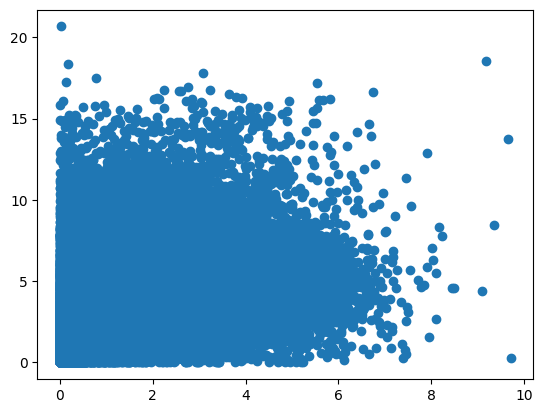

In [37]:
plt.scatter(np.log2(expression_all['sum_c']+1),np.log2(expression_all['sum']+1))

In [52]:
expression_cysts[['tpm.y','RNA.0']].corr(method='spearman')

,tpm.y,RNA.0
tpm.y,1.000000,0.342559
RNA.0,0.342559,1.000000


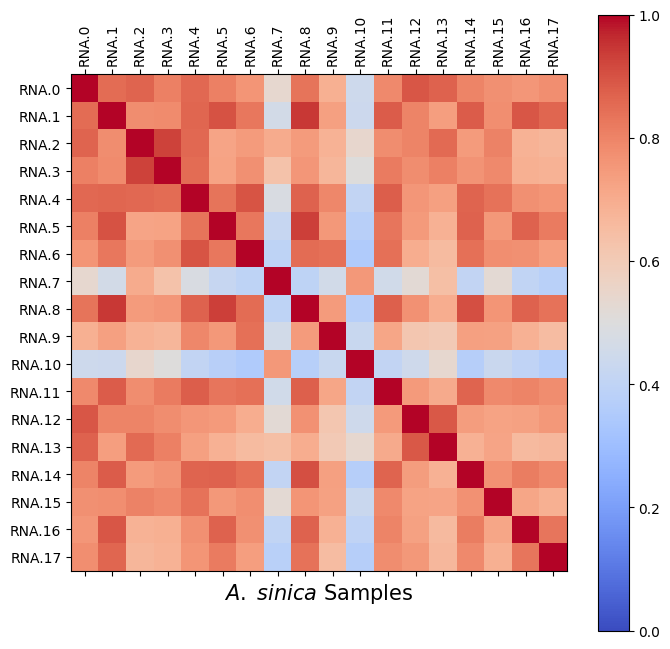

In [71]:
#subclusters
corr = average_expression[['RNA.0', 'RNA.1', 'RNA.2', 'RNA.3', 'RNA.4', 'RNA.5', 'RNA.6',
       'RNA.7','RNA.8', 'RNA.9', 'RNA.10', 'RNA.11', 'RNA.12', 'RNA.13',
       'RNA.14', 'RNA.15', 'RNA.16','RNA.17']].corr(method='spearman')
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.xlabel('$\it{A.}$ $\it{sinica}$ Samples',fontsize=15)
plt.savefig('correlation_sinica.png',bbox_inches='tight')
#plt.show()

In [274]:
expression_cysts.columns

Index(['target_id', 'tpm.x', 'tpm.y', 'gene', 'RNA.0', 'RNA.1', 'RNA.2',
       'RNA.3', 'RNA.4', 'RNA.5', 'RNA.6', 'RNA.7', 'RNA.8', 'RNA.9', 'RNA.10',
       'RNA.11', 'RNA.12', 'RNA.13', 'RNA.14', 'RNA.15', 'RNA.16', 'RNA.17',
       'RNA.18', 'RNA.19', 'RNA.20', 'RNA.21', 'RNA.22', 'RNA.23', 'RNA.24',
       'RNA.25', 'RNA.26', 'RNA.27', 'RNA.28', 'RNA.29', 'RNA.30', 'RNA.31',
       'sum_c'],
      dtype='object')

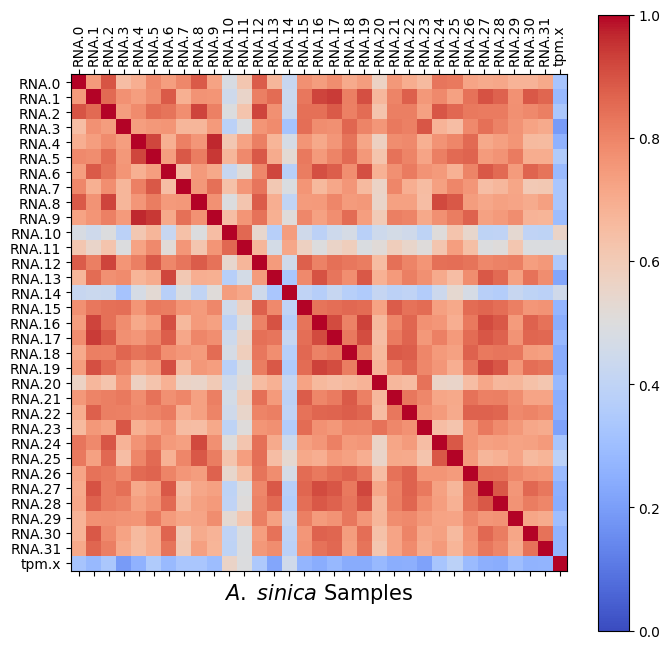

In [275]:
#subclusters
corr = expression_cysts[['RNA.0', 'RNA.1', 'RNA.2',
       'RNA.3', 'RNA.4', 'RNA.5', 'RNA.6', 'RNA.7', 'RNA.8', 'RNA.9', 'RNA.10',
       'RNA.11', 'RNA.12', 'RNA.13', 'RNA.14', 'RNA.15', 'RNA.16', 'RNA.17',
       'RNA.18', 'RNA.19', 'RNA.20', 'RNA.21', 'RNA.22', 'RNA.23', 'RNA.24',
       'RNA.25', 'RNA.26', 'RNA.27', 'RNA.28', 'RNA.29', 'RNA.30', 'RNA.31','tpm.x']].corr(method='spearman')
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.xlabel('$\it{A.}$ $\it{sinica}$ Samples',fontsize=15)
plt.savefig('correlation_sinica.png',bbox_inches='tight')
#plt.show()

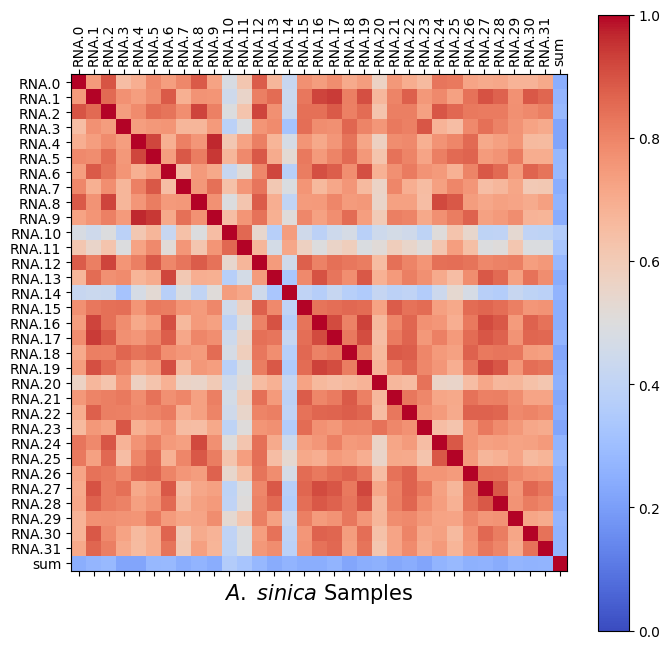

In [276]:
corr = expression_all[['RNA.0', 'RNA.1', 'RNA.2',
       'RNA.3', 'RNA.4', 'RNA.5', 'RNA.6', 'RNA.7', 'RNA.8', 'RNA.9', 'RNA.10',
       'RNA.11', 'RNA.12', 'RNA.13', 'RNA.14', 'RNA.15', 'RNA.16', 'RNA.17',
       'RNA.18', 'RNA.19', 'RNA.20', 'RNA.21', 'RNA.22', 'RNA.23', 'RNA.24',
       'RNA.25', 'RNA.26', 'RNA.27', 'RNA.28', 'RNA.29', 'RNA.30', 'RNA.31','sum']].corr(method='spearman')
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.xlabel('$\it{A.}$ $\it{sinica}$ Samples',fontsize=15)
plt.savefig('correlation_sinica.png',bbox_inches='tight')
#plt.show()

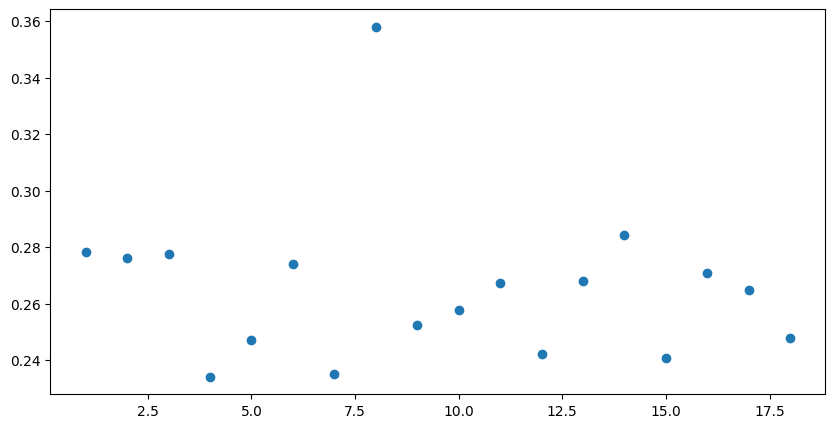

In [41]:
plt.figure(figsize=(10, 5))
plt.scatter(np.arange(1,19),corr['sum'].drop('sum',axis=0))

In [180]:
gene_vs_count=pd.read_csv("Gene_Count_per_Cell_cluster_7.tsv",sep="\t")
#gene_vs_count=gene_vs_count.loc[~(gene_vs_count==0).all(axis=1)]
#merged_gene_count=pd.merge(gene_vs_count,fran_gtf_2,left_on='gene',right_on='gene_id')
#merged_gene_count[merged_gene_count.drop([0,2,3,'gene','gene_id'],axis=1).columns]=np.log2(merged_gene_count[merged_gene_count.drop([0,2,3,'gene','gene_id'],axis=1).columns]+1)

In [184]:
gene_vs_count.T.reset_index(level=0)

,index,0,1,2,3,4,5,6,7,8,...,32572,32573,32574,32575,32576,32577,32578,32579,32580,32581
0,gene,MSTRG.1,MSTRG.2,MSTRG.3,MSTRG.4,MSTRG.5,MSTRG.6,MSTRG.7,MSTRG.8,MSTRG.9,...,MSTRG.32600,MSTRG.32601,MSTRG.32602,MSTRG.32603,MSTRG.32604,MSTRG.32605,MSTRG.32606,MSTRG.32607,MSTRG.32608,MSTRG.32609
1,AACCTGATCTCACTCG.1,0,1,0,0,0,0,0,5,0,...,22,0,0,0,4,2,0,0,20,6
2,TTTAGTCAGTAGACAT.1,0,1,0,0,0,0,0,5,0,...,5,3,0,0,0,1,0,0,0,0
3,GCGGATCCACTAAACC.1,0,0,0,0,0,0,0,0,0,...,2,0,0,0,1,2,0,0,1,1
4,ACGATGTCAACGGGTA.1,0,0,0,0,0,0,1,0,0,...,3,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,GCAACCGAGAATTGTG.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451,ATTCAGGCACTTGAAC.1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
452,GTGGGAAAGCGTACAG.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
453,TTGATGGCATTCTGTT.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
normalized=(gene_vs_count.drop(['gene'],axis=1)-gene_vs_count.drop(['gene'],axis=1).min())/(gene_vs_count.drop(['gene'],axis=1).max()-gene_vs_count.drop(['gene'],axis=1).min())

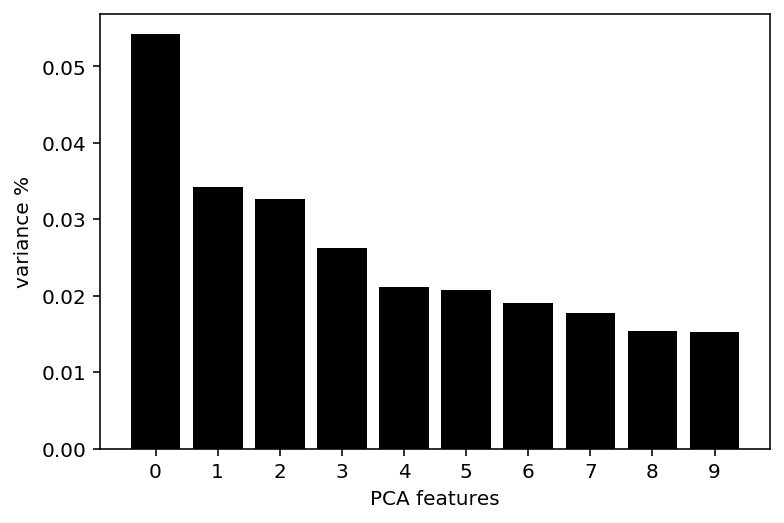

In [141]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
# Load in the data
#df = pd.read_csv('2013_2014_cleaned.csv')
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(normalized.T.iloc[1:])
# Create a PCA instance: pca
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [93]:
merged_gene_count[merged_gene_count[0]=='LG2'].drop([0,2,3,'gene_id','gene'],axis=1).sum(axis=0)

AACCTGATCTCACTCG.1    8375
TTTAGTCAGTAGACAT.1    2216
GCGGATCCACTAAACC.1    1054
ACGATGTCAACGGGTA.1     730
CCATCACTCTTTGATC.1     775
                      ... 
GCAACCGAGAATTGTG.1      12
ATTCAGGCACTTGAAC.1      17
GTGGGAAAGCGTACAG.1      13
TTGATGGCATTCTGTT.1      29
CATGCGGGTGTCGCTG.1      32
Length: 454, dtype: int64

In [175]:
fig = plt.figure(figsize=(10,8))
plt.scatter(np.arange(1,455,1),merged_gene_count[(merged_gene_count[0]=='LG6')&(merged_gene_count[3]>3.6*10**7)&(merged_gene_count[3]<4.2*10**7)].drop([0,2,3,'gene_id','gene'],axis=1).median(axis=0)/merged_gene_count.drop([0,2,3,'gene_id','gene'],axis=1).median(axis=0))
#plt.scatter(np.arange(1,455,1),merged_gene_count[(merged_gene_count[0]=='LG6')&(merged_gene_count[3]<3.6*10**7)&(merged_gene_count[3]>3*10**7)].drop([0,2,3,'gene_id','gene'],axis=1).sum(axis=0)/merged_gene_count.drop([0,2,3,'gene_id','gene'],axis=1).sum(axis=0))
#plt.scatter(np.arange(1,455,1),merged_gene_count[(merged_gene_count[0]=='LG6')&(merged_gene_count[3]<3*10**7)].drop([0,2,3,'gene_id','gene'],axis=1).sum(axis=0)/merged_gene_count.drop([0,2,3,'gene_id','gene'],axis=1).sum(axis=0))

NameError: name 'merged_gene_count' is not defined

<Figure size 1000x800 with 0 Axes>

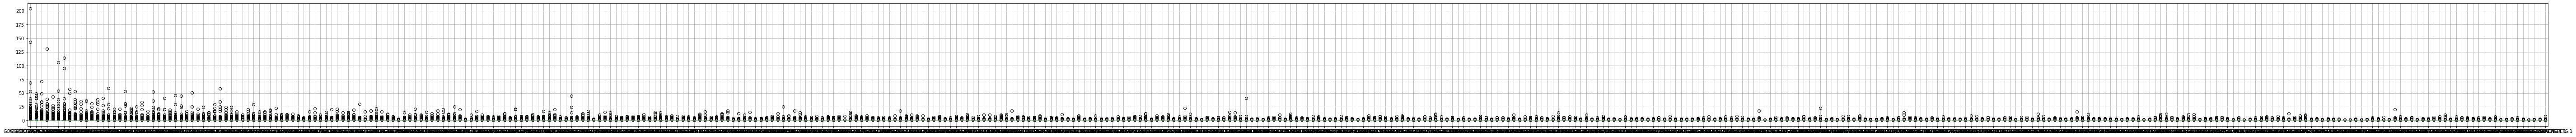

In [43]:
fig = plt.figure(figsize=(100,5))
merged_gene_count[merged_gene_count[0]=='LG1'].drop(['AACCTGATCTCACTCG.1','TTTAGTCAGTAGACAT.1',0,2,3,'gene_id','gene'],axis=1).boxplot()
#region = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','C15','C16','C17']
#plt.xticks(np.arange(1,19), region)

In [13]:
gene_vs_count['sum_c']=gene_vs_count.sum(axis=1,numeric_only = True)

In [152]:
expression_per_cell=pd.merge(cyst_expression,gene_vs_count,left_on='target_id',right_on='gene')

In [154]:
fig = plt.figure(figsize=(100,8))

plt.scatter(np.arange(0,len(expression_per_cell.corr(method='spearman')['tpm.x']),1),expression_per_cell.corr(method='spearman')['tpm.x'])

MemoryError: Unable to allocate 383. MiB for an array with shape (7084, 7084) and data type float64

<Figure size 7200x576 with 0 Axes>

In [241]:
cluster_7_snps=pd.read_csv("cluster_7_snps_7082.txt",sep="\t")
cluster_10_snps=pd.read_csv("cluster_10_snps_7082.txt",sep="\t")
cluster_0_snps=pd.read_csv("cluster_0_snps_7082.txt",sep="\t")
cluster_1_snps=pd.read_csv("cluster_1_snps_7082.txt",sep="\t")
cluster_2_snps=pd.read_csv("cluster_2_snps_7082.txt",sep="\t")
cluster_3_snps=pd.read_csv("cluster_3_snps_7082.txt",sep="\t")
cluster_4_snps=pd.read_csv("cluster_4_snps_7082.txt",sep="\t")
cluster_5_snps=pd.read_csv("cluster_5_snps_7082.txt",sep="\t")
cluster_6_snps=pd.read_csv("cluster_6_snps_7082.txt",sep="\t")


In [220]:
cluster_7_snps

,barcodes,seurat_clusters,homozygous,heterozygous
0,ACCTGATCTCACTCG,7,62497,13745
1,TTAGTCAGTAGACAT,7,83239,6765
2,CGGATCCACTAAACC,7,24513,2448
3,CGATGTCAACGGGTA,7,31183,1487
4,CATCACTCTTTGATC,7,21957,1791
...,...,...,...,...
449,CAACCGAGAATTGTG,7,3331,29
450,TTCAGGCACTTGAAC,7,3268,48
451,TGGGAAAGCGTACAG,7,3201,47
452,TGATGGCATTCTGTT,7,3170,27


In [68]:
cluster_7_snps[cluster_7_snps['barcodes']=='ATGTTCTCGCGTCGA']

,barcodes,seurat_clusters,homozygous,heterozygous
248,ATGTTCTCGCGTCGA,7,4761,106


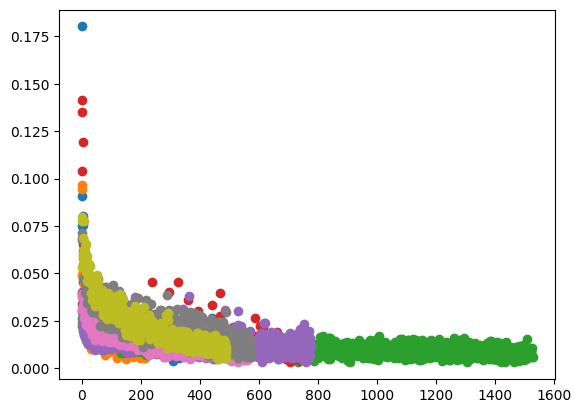

In [53]:
plt.scatter(np.arange(0,len(cluster_7_snps['heterozygous']),1),cluster_7_snps['heterozygous']/(cluster_7_snps['homozygous']+cluster_7_snps['heterozygous']))
plt.scatter(np.arange(0,len(cluster_10_snps['heterozygous']),1),cluster_10_snps['heterozygous']/(cluster_10_snps['homozygous']+cluster_10_snps['heterozygous']))
plt.scatter(np.arange(0,len(cluster_0_snps['heterozygous']),1),cluster_0_snps['heterozygous']/(cluster_0_snps['homozygous']+cluster_0_snps['heterozygous']))
plt.scatter(np.arange(0,len(cluster_1_snps['heterozygous']),1),cluster_1_snps['heterozygous']/(cluster_1_snps['homozygous']+cluster_1_snps['heterozygous']))
plt.scatter(np.arange(0,len(cluster_2_snps['heterozygous']),1),cluster_2_snps['heterozygous']/(cluster_2_snps['homozygous']+cluster_2_snps['heterozygous']))
plt.scatter(np.arange(0,len(cluster_3_snps['heterozygous']),1),cluster_3_snps['heterozygous']/(cluster_3_snps['homozygous']+cluster_3_snps['heterozygous']))
plt.scatter(np.arange(0,len(cluster_4_snps['heterozygous']),1),cluster_4_snps['heterozygous']/(cluster_4_snps['homozygous']+cluster_4_snps['heterozygous']))
plt.scatter(np.arange(0,len(cluster_5_snps['heterozygous']),1),cluster_5_snps['heterozygous']/(cluster_5_snps['homozygous']+cluster_5_snps['heterozygous']))
plt.scatter(np.arange(0,len(cluster_6_snps['heterozygous']),1),cluster_6_snps['heterozygous']/(cluster_6_snps['homozygous']+cluster_6_snps['heterozygous']))


([<matplotlib.axis.XTick at 0x27bf386ce10>,
 [Text(1, 0, 'C0'),
  Text(2, 0, 'C1'),
  Text(3, 0, 'C2'),
  Text(4, 0, 'C3'),
  Text(5, 0, 'C4'),
  Text(6, 0, 'C5'),
  Text(7, 0, 'C6'),
  Text(8, 0, 'C7'),
  Text(9, 0, 'C8'),
  Text(10, 0, 'C9'),
  Text(11, 0, 'C10'),
  Text(12, 0, 'C11'),
  Text(13, 0, 'C12'),
  Text(14, 0, 'C13'),
  Text(15, 0, 'C14'),
  Text(16, 0, 'C15'),
  Text(17, 0, 'C16'),
  Text(18, 0, 'C17')])

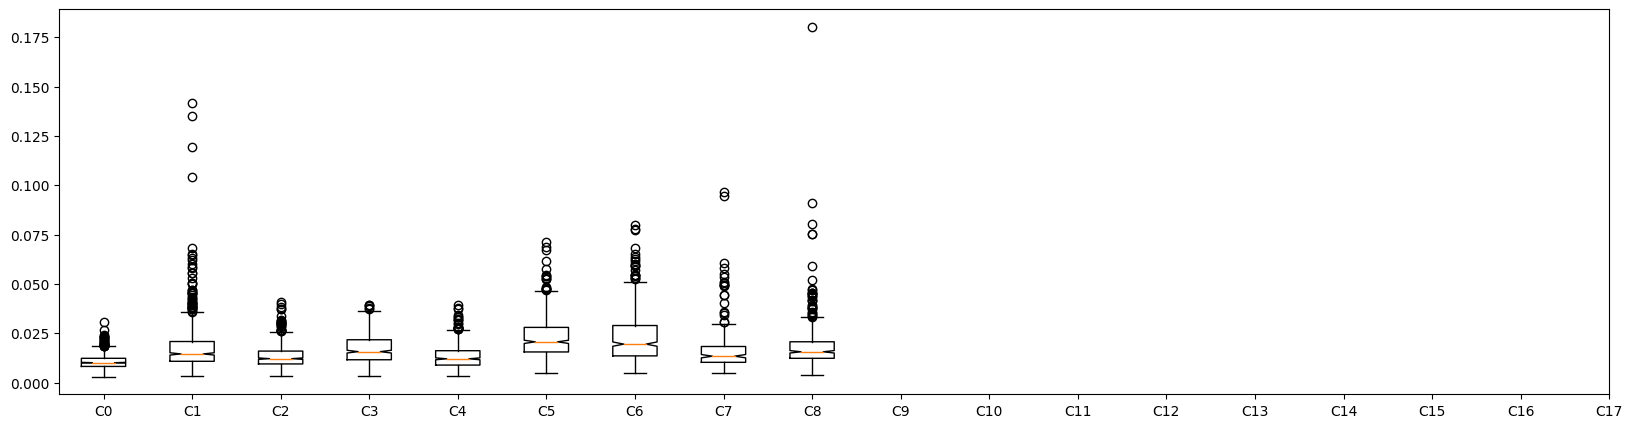

In [249]:
fig = plt.figure(figsize=(20,5))
plt.boxplot([cluster_0_snps['heterozygous']/(cluster_0_snps['homozygous']+cluster_0_snps['heterozygous']),cluster_1_snps['heterozygous']/(cluster_1_snps['homozygous']+cluster_1_snps['heterozygous']),cluster_2_snps['heterozygous']/(cluster_2_snps['homozygous']+cluster_2_snps['heterozygous']),cluster_3_snps['heterozygous']/(cluster_3_snps['homozygous']+cluster_3_snps['heterozygous']),cluster_4_snps['heterozygous']/(cluster_4_snps['homozygous']+cluster_4_snps['heterozygous']),cluster_5_snps['heterozygous']/(cluster_5_snps['homozygous']+cluster_5_snps['heterozygous']),cluster_6_snps['heterozygous']/(cluster_6_snps['homozygous']+cluster_6_snps['heterozygous']),cluster_10_snps['heterozygous']/(cluster_10_snps['homozygous']+cluster_10_snps['heterozygous']),cluster_7_snps['heterozygous']/(cluster_7_snps['homozygous']+cluster_7_snps['heterozygous'])],[1,2,3])#,showfliers=False)
region = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','C15','C16','C17']
plt.xticks(np.arange(1,19), region)

In [64]:
eigen=pd.read_csv("artemia_7.eigenvec",sep="\t")


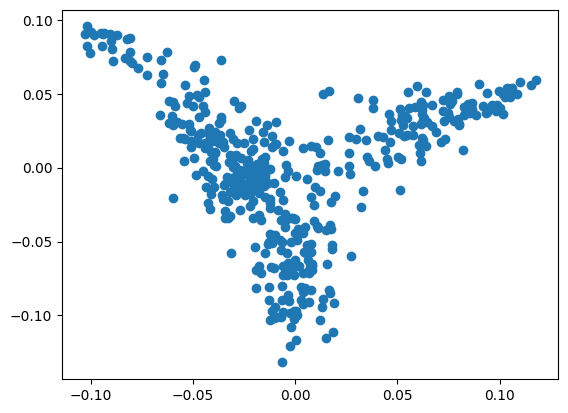

In [65]:
plt.scatter(eigen['PC1'],eigen['PC2'])

In [233]:
average_expression=pd.read_csv("average_expression.txt",sep=" ")
sleuth_sign=pd.read_csv("sleuth_significant_transcripts.txt",sep=" ")

In [236]:
pd.merge(sleuth_sign,Kallisto,left_on='target_id',right_on='transcript')

,target_id,pval,qval,test_stat,rss,degrees_free,mean_obs,var_obs,tech_var,sigma_sq,...,s2,s3,s4,s5,s6,s7,s8,s9,sum_ovaries,sum_nauplii
0,MSTRG.18220.1,1.634155e-21,4.274786e-17,90.745220,109.979446,1.0,10.840515,7.331963,0.001290,7.330674,...,2535.655179,2497.466634,2583.939800,1959.867564,2500.296875,2405.808486,1890.585896,2866.765861,2.619768,33052.554172
1,MSTRG.3533.1,1.271513e-19,1.663075e-15,82.134231,95.415723,1.0,9.458738,6.361048,0.002789,6.358259,...,417.047675,393.067547,466.135420,407.073142,491.000452,409.913568,364.913935,488.799952,0.814489,6200.916159
2,MSTRG.23270.1,2.021554e-19,1.762728e-15,81.217873,62.970977,1.0,11.650489,4.198065,0.000115,4.197950,...,1902.660777,2059.137590,1554.410147,1485.147857,1822.367908,1860.996765,1485.194282,1769.172111,12.279017,23926.938368
3,MSTRG.11635.1,3.444007e-19,1.801836e-15,80.165077,102.217205,1.0,8.973793,6.814480,0.007676,6.806804,...,154.926616,161.860762,114.566795,125.195718,190.402345,147.407656,146.431611,197.225599,0.206740,2225.484636
4,MSTRG.12829.1,2.853913e-19,1.801836e-15,80.536453,53.165488,1.0,10.019127,3.544366,0.000369,3.543997,...,4530.726932,4384.087634,4507.926530,5495.715392,5196.046213,4914.625033,4416.408142,5571.323142,97.611934,65112.807458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,MSTRG.20159.1,3.863551e-10,1.063859e-08,39.180626,3.460425,1.0,10.344213,0.230695,0.000032,0.230663,...,532.311700,448.581518,448.823886,482.944359,487.287668,418.315078,427.653014,507.178417,357.125524,6673.282460
950,MSTRG.22803.1,3.874949e-10,1.065876e-08,39.174874,12.134725,1.0,9.116335,0.808982,0.000148,0.808834,...,129.865541,70.953170,104.809507,110.155002,115.025577,83.555659,61.019843,77.167375,22.086752,1453.362038
951,MSTRG.87.1,3.908884e-10,1.074081e-08,39.157850,10.166450,1.0,7.068698,0.677763,0.001173,0.676590,...,1.916769,3.869697,1.724648,2.911171,2.111946,2.076680,3.117933,1.829667,56.681147,29.200363
952,MSTRG.20122.1,3.924602e-10,1.077268e-08,39.150015,4.800720,1.0,7.736800,0.320048,0.000536,0.319512,...,3.585300,4.173583,3.108248,3.130803,3.341668,3.716042,3.659557,3.052198,45.044508,48.213226


In [160]:
Kallisto=pd.read_csv("KallistoSummary_transcripts.txt",sep=" ")
Kallisto['sum_ovaries']=(Kallisto['o1']+Kallisto['o2'])/2
Kallisto['sum_nauplii']=(Kallisto['s1']+Kallisto['s2']+Kallisto['s2']+Kallisto['s4']+Kallisto['s5']+Kallisto['s6']+Kallisto['s7']+Kallisto['s8']+Kallisto['s9']+Kallisto['s10']+Kallisto['s11']+Kallisto['s12']+Kallisto['s13']+Kallisto['s15'])/14
Kallisto_2=Kallisto[['transcript','sum_ovaries','sum_nauplii']]
f_vs_d_2=pd.read_csv("f_vs_d_2_table.txt",sep="\t")
f_vs_d_3=f_vs_d_2[['gene_id','gene_name','Qname']]
dmel_exp=pd.read_csv("Dmel_embryo_TPM.txt",sep=" ")

In [161]:
dmel_vs_Afran=pd.merge(dmel_exp,f_vs_d_3,left_on='Gene',right_on='gene_id')
dmel_vs_Afran_2=pd.merge(dmel_vs_Afran,Kallisto,left_on='Qname',right_on='transcript')

In [489]:
dmel_vs_Afran_4[dmel_vs_Afran_4['gene_name'].str.contains('sa')]

,Gene,gene_id,gene_name,Qname,transcript,sum_ovaries,sum_nauplii,Dro10,Dro11,Dro12,Dro13,Dro14
115,FBgn0000416,FBgn0000416,sap-r,MSTRG.28004.1,MSTRG.28004.1,55.229008,9.945271,457.328500,360.726500,522.390000,455.337500,384.339563
511,FBgn0003317,FBgn0003317,sax,MSTRG.1042.1,MSTRG.1042.1,5.322818,2.464473,109.346500,110.345000,126.097500,122.787500,55.007856
512,FBgn0003317,FBgn0003317,sax,MSTRG.493.1,MSTRG.493.1,4.805376,1.476857,109.346500,110.345000,126.097500,122.787500,55.007856
812,FBgn0004888,FBgn0004888,scsalpha,MSTRG.22845.1,MSTRG.22845.1,61.302735,369.044206,286.529500,422.112000,308.967500,313.197000,319.915375
840,FBgn0005278,FBgn0005278,sam-s,MSTRG.12281.1,MSTRG.12281.1,468.304475,60.678687,578.947500,336.476000,608.843500,622.422500,551.252500
841,FBgn0005278,FBgn0005278,sam-s,MSTRG.12298.1,MSTRG.12298.1,663.106325,366.566477,578.947500,336.476000,608.843500,622.422500,551.252500
842,FBgn0005278,FBgn0005278,sam-s,MSTRG.27134.1,MSTRG.27134.1,0.446934,0.567885,578.947500,336.476000,608.843500,622.422500,551.252500
951,FBgn0010350,FBgn0010350,cdsa,MSTRG.20082.1,MSTRG.20082.1,10.145579,17.401351,99.801250,46.064650,106.334250,81.227750,7.805996
1176,FBgn0013334,FBgn0013334,sap47,MSTRG.2725.1,MSTRG.2725.1,10.089537,0.989090,33.600300,47.620050,36.216250,40.268950,46.198569
1408,FBgn0016697,FBgn0016697,prosalpha5,MSTRG.12552.1,MSTRG.12552.1,1.012784,0.353647,486.109000,519.742000,562.148500,664.343500,768.535625


In [177]:
dmel_vs_Afran_4[(dmel_vs_Afran_4['Dro14']>2)&(dmel_vs_Afran_4['Dro10']<1)&(dmel_vs_Afran_4['sum_nauplii']>2)&(dmel_vs_Afran_4['sum_ovaries']<1)]

,Gene,gene_id,gene_name,Qname,transcript,sum_ovaries,sum_nauplii,Dro10,Dro11,Dro12,Dro13,Dro14
248,FBgn0001123,FBgn0001123,galphas,MSTRG.9910.1,MSTRG.9910.1,0.831571,3.782402,0.587879,0.081451,0.182879,0.639091,23.880950
494,FBgn0003250,FBgn0003250,rh4,MSTRG.3533.1,MSTRG.3533.1,0.407245,442.922583,0.094108,0.350811,0.032508,0.214091,3.067203
495,FBgn0003250,FBgn0003250,rh4,MSTRG.7571.1,MSTRG.7571.1,0.337973,6.011994,0.094108,0.350811,0.032508,0.214091,3.067203
705,FBgn0004567,FBgn0004567,slp2,MSTRG.31823.1,MSTRG.31823.1,0.553485,3.524210,0.000000,0.000000,0.357147,1.037824,5.285679
720,FBgn0004595,FBgn0004595,pros,MSTRG.14529.1,MSTRG.14529.1,0.990982,2.403384,0.016049,0.040938,0.075541,0.084380,9.430482
1219,FBgn0013953,FBgn0013953,esp,MSTRG.22788.1,MSTRG.22788.1,0.276012,2.714148,0.000000,0.000000,0.000000,0.197299,9.399417
2128,FBgn0029123,FBgn0029123,soxn,MSTRG.1822.1,MSTRG.1822.1,0.408142,3.685934,0.079658,0.076140,0.477264,1.581498,38.758691
2603,FBgn0031717,FBgn0031717,oscillin,MSTRG.3237.1,MSTRG.3237.1,0.794035,2.266563,0.140210,0.176280,1.301515,1.308550,11.669877


In [162]:
dmel_vs_Afran_3=dmel_vs_Afran_2[['Gene', 'Dro10_1', 'Dro_10_2', 'Dro_11_1', 'Dro_11_2', 'Dro_12_1','Dro_12_2', 'Dro_13_1','Dro_13_2', 'Dro_14a_1',
       'Dro_14a_2', 'Dro_14b_1', 'Dro_14b_2', 'Dro_14c_1', 'Dro_14c_2',
       'Dro_14d_1', 'Dro_14d_2','Dro_14a_3', 'Dro_14a_4', 'Dro_14b_3', 'Dro_14b_4',
       'Dro_14c_3', 'Dro_14c_4', 'Dro_14d_3', 'Dro_14d_4', 'gene_id',
       'gene_name', 'Qname', 'transcript', 'o1', 'o2', 's1', 's10', 's11',
       's12', 's13', 's15', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9',
       'sum_ovaries', 'sum_nauplii']]
dmel_vs_Afran_3['Dro10']=(dmel_vs_Afran_3['Dro10_1']+dmel_vs_Afran_3['Dro_10_2'])/2
dmel_vs_Afran_3['Dro11']=(dmel_vs_Afran_3['Dro_11_1']+dmel_vs_Afran_3['Dro_11_2'])/2
dmel_vs_Afran_3['Dro12']=(dmel_vs_Afran_3['Dro_12_1']+dmel_vs_Afran_3['Dro_12_2'])/2
dmel_vs_Afran_3['Dro13']=(dmel_vs_Afran_3['Dro_13_1']+dmel_vs_Afran_3['Dro_13_2'])/2
dmel_vs_Afran_3['Dro14']=(dmel_vs_Afran_3['Dro_14a_1']+dmel_vs_Afran_3['Dro_14a_2']+dmel_vs_Afran_3['Dro_14a_3']+dmel_vs_Afran_3['Dro_14a_4']+dmel_vs_Afran_3['Dro_14b_1']+dmel_vs_Afran_3['Dro_14b_2']+dmel_vs_Afran_3['Dro_14b_3']+dmel_vs_Afran_3['Dro_14b_4']+dmel_vs_Afran_3['Dro_14c_1']+dmel_vs_Afran_3['Dro_14c_2']+dmel_vs_Afran_3['Dro_14c_3']+dmel_vs_Afran_3['Dro_14c_4']+dmel_vs_Afran_3['Dro_14d_1']+dmel_vs_Afran_3['Dro_14d_2']+dmel_vs_Afran_3['Dro_14d_3']+dmel_vs_Afran_3['Dro_14d_4'])/16
dmel_vs_Afran_4=dmel_vs_Afran_3[['Gene','gene_id','gene_name', 'Qname', 'transcript','sum_ovaries', 'sum_nauplii','Dro10','Dro11','Dro12','Dro13','Dro14']]

C:\Users\melkrewi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\melkrewi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
C:\Users\melkrewi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

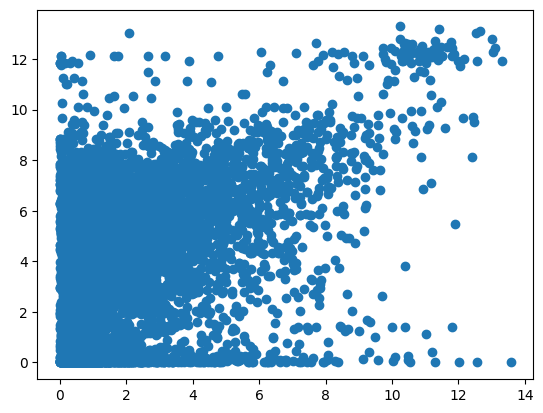

In [295]:
plt.scatter(np.log2(dmel_vs_Afran_4['sum_nauplii']+1),np.log2(dmel_vs_Afran_4['Dro14']+1))

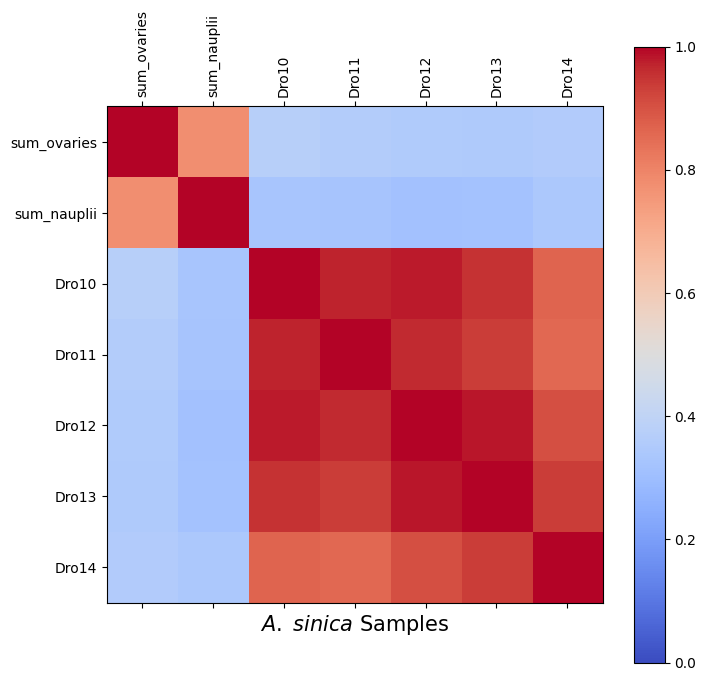

In [296]:
corr = dmel_vs_Afran_3[['sum_ovaries', 'sum_nauplii','Dro10','Dro11','Dro12','Dro13','Dro14']].corr(method='spearman')
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.xlabel('$\it{A.}$ $\it{sinica}$ Samples',fontsize=15)
plt.savefig('correlation_sinica.png',bbox_inches='tight')
#plt.show()

In [293]:
dmel_vs_Afran_4[(dmel_vs_Afran_4['sum_ovaries']<2)&(dmel_vs_Afran_4['sum_nauplii']>1)&(dmel_vs_Afran_4['Dro14']>1)&(dmel_vs_Afran_4['Dro10']<2)]

,Gene,gene_id,gene_name,Qname,transcript,sum_ovaries,sum_nauplii,Dro10,Dro11,Dro12,Dro13,Dro14
68,FBgn0000157,FBgn0000157,dll,MSTRG.19416.1,MSTRG.19416.1,1.781832,3.098473,0.000000,0.000000,0.000000,0.000000,4.809398
248,FBgn0001123,FBgn0001123,galphas,MSTRG.9910.1,MSTRG.9910.1,0.831571,3.782402,0.587879,0.081451,0.182879,0.639091,23.880950
494,FBgn0003250,FBgn0003250,rh4,MSTRG.3533.1,MSTRG.3533.1,0.407245,442.922583,0.094108,0.350811,0.032508,0.214091,3.067203
495,FBgn0003250,FBgn0003250,rh4,MSTRG.7571.1,MSTRG.7571.1,0.337973,6.011994,0.094108,0.350811,0.032508,0.214091,3.067203
560,FBgn0003460,FBgn0003460,so,MSTRG.14338.1,MSTRG.14338.1,1.583244,1.706420,0.000000,0.000000,0.034491,0.036523,1.660581
563,FBgn0003463,FBgn0003463,sog,MSTRG.23073.1,MSTRG.23073.1,1.119797,1.872235,0.000000,0.015702,0.115923,1.182164,60.792569
615,FBgn0003896,FBgn0003896,tup,MSTRG.10078.1,MSTRG.10078.1,0.614422,1.248075,0.000000,0.000000,0.021839,0.061641,7.863326
621,FBgn0003963,FBgn0003963,ush,MSTRG.22669.1,MSTRG.22669.1,0.295676,2.009209,1.724240,0.658632,1.002274,0.288218,12.315067
689,FBgn0004456,FBgn0004456,mew,MSTRG.10630.1,MSTRG.10630.1,1.370130,1.772257,0.048143,0.073263,0.060797,0.000000,11.914990
705,FBgn0004567,FBgn0004567,slp2,MSTRG.31823.1,MSTRG.31823.1,0.553485,3.524210,0.000000,0.000000,0.357147,1.037824,5.285679


<AxesSubplot:>

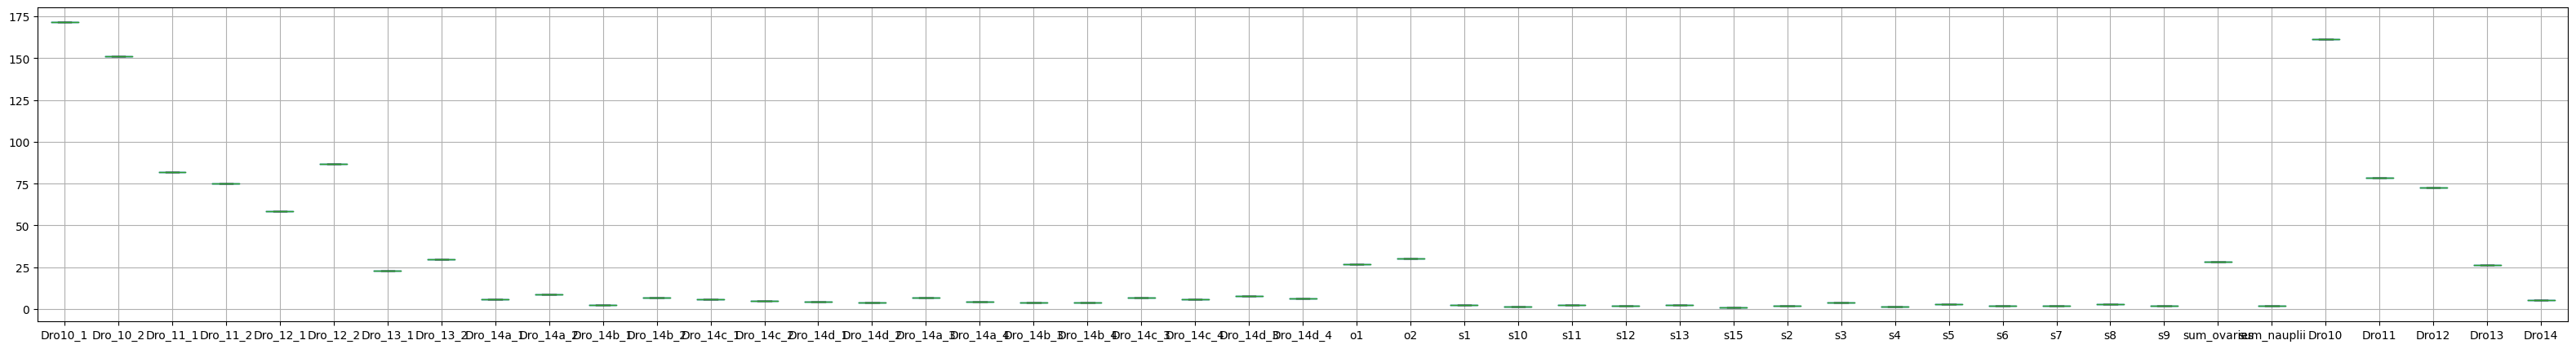

In [351]:
fig = plt.figure(figsize=(40,5))
dmel_vs_Afran_3[dmel_vs_Afran_3['transcript']=='MSTRG.87.1'].boxplot()

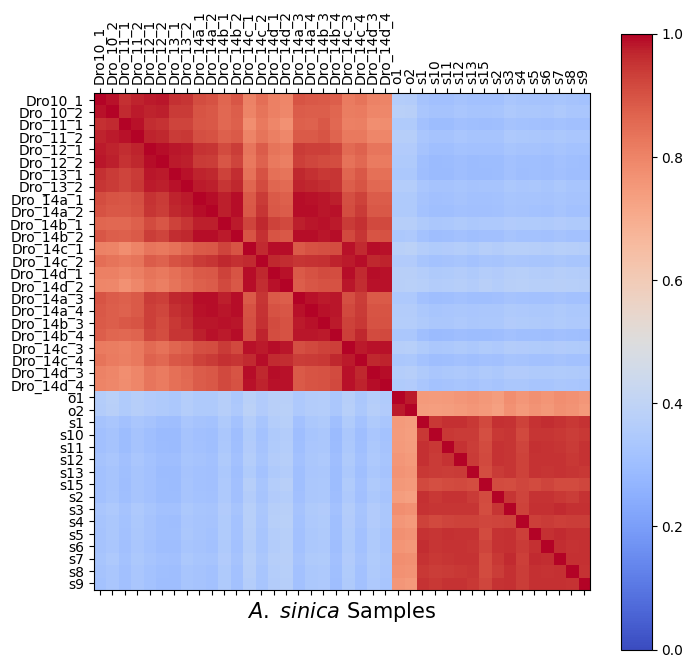

In [253]:
corr = dmel_vs_Afran_3[['Gene', 'Dro10_1', 'Dro_10_2', 'Dro_11_1', 'Dro_11_2', 'Dro_12_1','Dro_12_2', 'Dro_13_1','Dro_13_2', 'Dro_14a_1',
       'Dro_14a_2', 'Dro_14b_1', 'Dro_14b_2', 'Dro_14c_1', 'Dro_14c_2',
       'Dro_14d_1', 'Dro_14d_2','Dro_14a_3', 'Dro_14a_4', 'Dro_14b_3', 'Dro_14b_4',
       'Dro_14c_3', 'Dro_14c_4', 'Dro_14d_3', 'Dro_14d_4', 'gene_id',
       'gene_name', 'Qname', 'transcript', 'o1', 'o2', 's1', 's10', 's11',
       's12', 's13', 's15', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9']].corr(method='spearman')
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.xlabel('$\it{A.}$ $\it{sinica}$ Samples',fontsize=15)
plt.savefig('correlation_sinica.png',bbox_inches='tight')
#plt.show()

In [ ]:
'Dro_14a_1',
       'Dro_14a_2', 'Dro_14b_1', 'Dro_14b_2', 'Dro_14c_1', 'Dro_14c_2',
       'Dro_14d_1', 'Dro_14d_2','Dro_14a_3', 'Dro_14a_4', 'Dro_14b_3', 'Dro_14b_4',
       'Dro_14c_3', 'Dro_14c_4', 'Dro_14d_3', 'Dro_14d_4'

In [264]:
dmel_vs_Afran_3[(dmel_vs_Afran_3['sum_ovaries']<2)&(dmel_vs_Afran_3['sum_nauplii']>10)&(dmel_vs_Afran_3['Dro10_1']<1)&(dmel_vs_Afran_3['Dro_10_2']<1)&(dmel_vs_Afran_3['Dro_14a_2']+dmel_vs_Afran_3['Dro_14b_2']>4)]['transcript']

248      MSTRG.9910.1
720     MSTRG.14529.1
2128     MSTRG.1822.1
2603     MSTRG.3237.1
3790     MSTRG.7799.1
4226    MSTRG.30579.1
Name: transcript, dtype: object

In [187]:
Kallisto['sum_ovaries']=Kallisto['o1']+Kallisto['o2']

In [188]:
Kallisto['sum_nauplii']=Kallisto['s1']+Kallisto['s2']+Kallisto['s2']+Kallisto['s4']+Kallisto['s5']+Kallisto['s6']+Kallisto['s7']+Kallisto['s8']+Kallisto['s9']+Kallisto['s10']+Kallisto['s11']+Kallisto['s12']+Kallisto['s13']+Kallisto['s15']

In [241]:
merged=pd.merge(sleuth_sign,Kallisto,left_on='target_id',right_on='transcript')
#Kallisto[np.log2(Kallisto['sum_nauplii']+1)>]

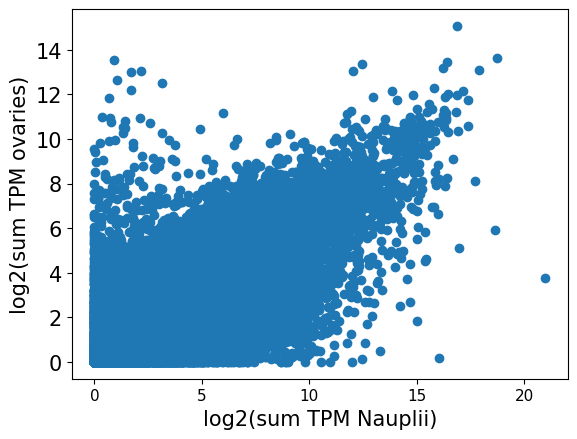

In [225]:
plt.scatter(np.log2(Kallisto['sum_nauplii']+1),np.log2(Kallisto['sum_ovaries']+1))
plt.ylabel('log2(sum TPM ovaries)',fontsize=15)
plt.xlabel('log2(sum TPM Nauplii)',fontsize=15)
#heights = [0, 0, 2.3, 2.7, 2.25]
#bars = np.arange(len(heights))
plt.xticks(fontsize=11)
plt.yticks(fontsize=15)
plt.savefig('TPM_ovary_vs_nauplii.png',bbox_inches='tight')

In [304]:
Kallisto[(Kallisto['transcript']=='MSTRG.24921.1')|(Kallisto['transcript']=='MSTRG.19058.1')]

,transcript,o1,o2,s1,s10,s11,s12,s13,s15,s2,s3,s4,s5,s6,s7,s8,s9,sum_ovaries,sum_nauplii
9999,MSTRG.19058.1,3.226099,3.994744,0.000000,0.378489,0.000000,0.000000,0.000000,0.000000,0.425236,0.455319,0.528469,0.000000,0.331146,0.000000,0.41713,0.358560,7.220843,2.864265
16461,MSTRG.24921.1,3.401081,2.739582,0.892811,0.990044,0.825911,1.393526,1.483519,1.453928,0.742104,1.019466,0.690808,1.336485,0.675509,1.093222,0.91642,0.854227,6.140663,14.090619


In [206]:
max(Kallisto[Kallisto['sum_ovaries']==0]['sum_nauplii'])

4072.5050787642767

In [245]:
list(merged[(merged['sum_ovaries']<1)&(merged['qval']<0.05)]['transcript'].str[:-2])

['MSTRG.3533',
 'MSTRG.11635',
 'MSTRG.13451',
 'MSTRG.26837',
 'MSTRG.6177',
 'MSTRG.31567',
 'MSTRG.20129',
 'MSTRG.20196',
 'MSTRG.18499',
 'MSTRG.6845',
 'MSTRG.7661',
 'MSTRG.30353',
 'MSTRG.4235',
 'MSTRG.13065',
 'MSTRG.30471',
 'MSTRG.19378',
 'MSTRG.13395',
 'MSTRG.5919',
 'MSTRG.24696',
 'MSTRG.1821',
 'MSTRG.14924',
 'MSTRG.23786',
 'MSTRG.27261',
 'MSTRG.2495',
 'MSTRG.29968',
 'MSTRG.28306',
 'MSTRG.26776',
 'MSTRG.16271',
 'MSTRG.2677',
 'MSTRG.23074',
 'MSTRG.5019',
 'MSTRG.12313',
 'MSTRG.30625',
 'MSTRG.3858',
 'MSTRG.19714',
 'MSTRG.16366',
 'MSTRG.31363',
 'MSTRG.10393',
 'MSTRG.6179',
 'MSTRG.3256',
 'MSTRG.32342',
 'MSTRG.7244',
 'MSTRG.30627',
 'MSTRG.20412',
 'MSTRG.17317',
 'MSTRG.9379',
 'MSTRG.30846',
 'MSTRG.2295',
 'MSTRG.29855',
 'MSTRG.32065',
 'MSTRG.30950',
 'MSTRG.6178',
 'MSTRG.27389',
 'MSTRG.24644',
 'MSTRG.13474',
 'MSTRG.27521',
 'MSTRG.29510',
 'MSTRG.22881',
 'MSTRG.14484',
 'MSTRG.18794',
 'MSTRG.19665',
 'MSTRG.3275',
 'MSTRG.18655',
 'MSTRG.10

In [520]:
exp_vs_w=pd.read_csv("expressed_vs_w_candidates.blat.sorted.besthit",sep="\t")

In [521]:
exp_vs_w['metric']=exp_vs_w['mismatch']/(exp_vs_w['mismatch']+exp_vs_w['match'])
exp_vs_w_2=exp_vs_w[(exp_vs_w['metric']<0.1)&(exp_vs_w['match']>100)]

In [522]:
exp_vs_w_2['transcript']=exp_vs_w_2['Tname'].str[:-2]

C:\Users\melkrewi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [523]:
list(exp_vs_w_2['Tname'].str[:-2])

['MSTRG.25707',
 'MSTRG.4399',
 'MSTRG.20423',
 'MSTRG.32472',
 'MSTRG.7607',
 'MSTRG.5423',
 'MSTRG.21751',
 'MSTRG.13681',
 'MSTRG.30687',
 'MSTRG.30688',
 'MSTRG.11441',
 'MSTRG.21122',
 'MSTRG.12473',
 'MSTRG.29385',
 'MSTRG.21817',
 'MSTRG.29370',
 'MSTRG.26166',
 'MSTRG.30687',
 'MSTRG.29370',
 'MSTRG.25579',
 'MSTRG.2478',
 'MSTRG.31799',
 'MSTRG.21759',
 'MSTRG.29073',
 'MSTRG.31796',
 'MSTRG.32472',
 'MSTRG.31822',
 'MSTRG.21785',
 'MSTRG.26166',
 'MSTRG.29370',
 'MSTRG.27338',
 'MSTRG.5113',
 'MSTRG.5957',
 'MSTRG.16395',
 'MSTRG.28336',
 'MSTRG.21755',
 'MSTRG.4726',
 'MSTRG.28336',
 'MSTRG.556',
 'MSTRG.29074',
 'MSTRG.6338',
 'MSTRG.30061',
 'MSTRG.3789',
 'MSTRG.4189',
 'MSTRG.28129',
 'MSTRG.26166',
 'MSTRG.3789',
 'MSTRG.4399',
 'MSTRG.21827',
 'MSTRG.21587',
 'MSTRG.21777',
 'MSTRG.14385',
 'MSTRG.21827',
 'MSTRG.25430',
 'MSTRG.21812',
 'MSTRG.25890',
 'MSTRG.11441',
 'MSTRG.32390',
 'MSTRG.21759',
 'MSTRG.29370',
 'MSTRG.29914',
 'MSTRG.21741',
 'MSTRG.29370',
 'MSTR

In [148]:
exp_vs_merged_all=pd.merge(merged_all[merged_all['identity']=='Z'],exp_vs_w_2,left_on='gene',right_on='transcript')

NameError: name 'merged_all' is not defined

In [147]:
exp_vs_merged_all_norm.columns

Index([              'gene', 'AACCTGATCTCACTCG-1', 'ATCCGTCCACTGGATT-1',
       'GAATCACAGCCTCACG-1', 'CACAGGCGTAGGAGTC-1', 'TCTCAGCTCTGGTGGC-1',
       'AGAACAAAGTTGTAAG-1', 'TCGTGGGAGCGTGCCT-1', 'ATGGAGGAGGTCCGAA-1',
       'GCTTGGGTCGATTTCT-1',
       ...
                    'Tname',              'Tsize',             'Tstart',
                     'Tend',         'blockcount',         'blockSizes',
                  'qStarts',            'tStarts',             'metric',
               'transcript'],
      dtype='object', length=7112)

KeyError: "None of [Index(['RNA.0', 'RNA.1', 'RNA.2', 'RNA.3', 'RNA.4', 'RNA.5', 'RNA.6', 'RNA.7',\n       'RNA.8', 'RNA.9', 'RNA.10', 'RNA.11', 'RNA.12', 'RNA.13', 'RNA.14',\n       'RNA.15', 'RNA.16', 'RNA.17'],\n      dtype='object')] are in the [columns]"

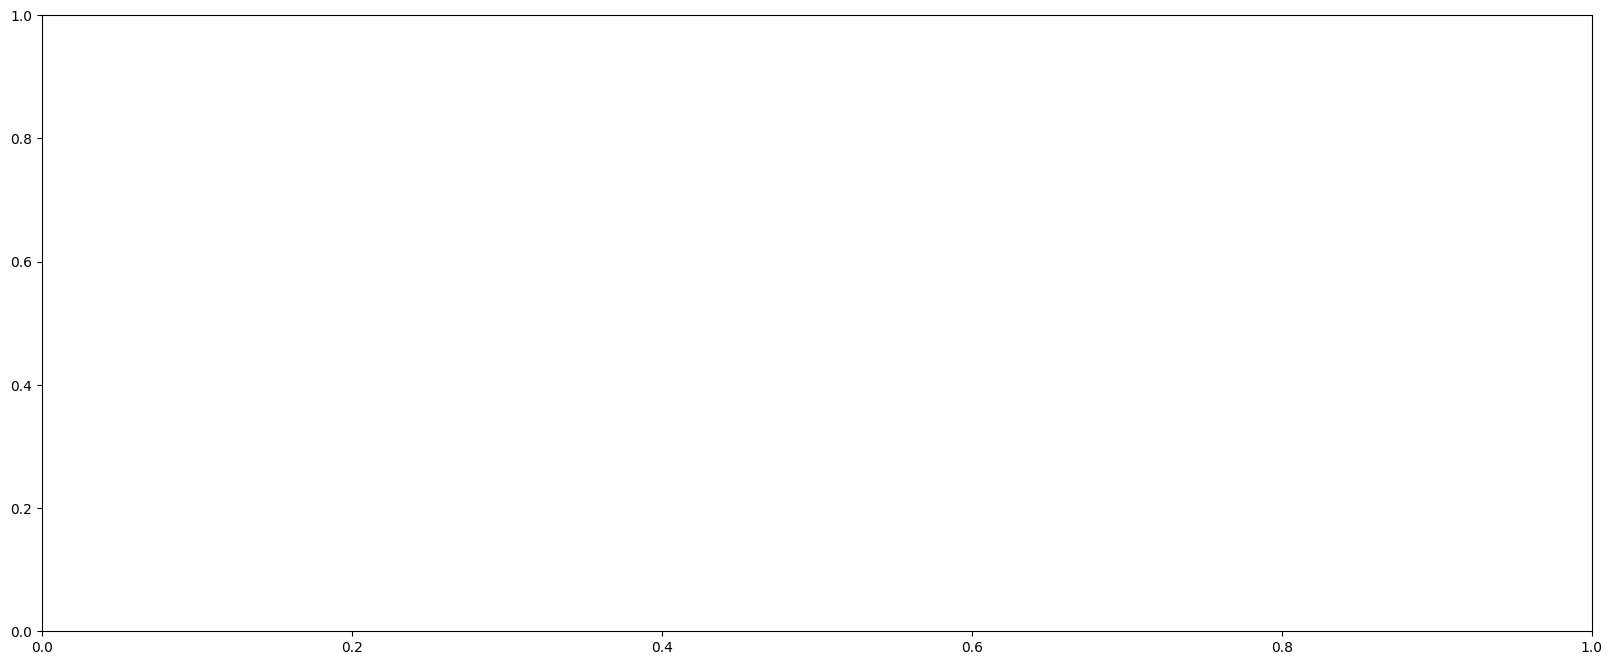

In [145]:
fig = plt.figure(figsize=(20,8))
exp_vs_merged_all_norm.boxplot(column=['RNA.0',      'RNA.1',      'RNA.2',      'RNA.3',
            'RNA.4',      'RNA.5',      'RNA.6',      'RNA.7',      'RNA.8',
            'RNA.9',     'RNA.10',     'RNA.11',     'RNA.12',     'RNA.13',
           'RNA.14',     'RNA.15',     'RNA.16',     'RNA.17'],figsize=(10, 5),showfliers=False)

In [3]:
#seurat_clusters=pd.read_csv("merged_fran_adult_2.gtf",sep="\t",header=None)
normalized_exp=pd.read_csv("normalized_expression.csv",sep=",",low_memory=False)
#normalized_exp=pd.read_csv("normalized_expression_combined.csv",sep=",",low_memory=False)

In [4]:
merged_normalized=pd.merge(normalized_exp,fran_gtf_2,left_on='gene',right_on='gene_id')
merged_all_norm=merged_normalized[merged_normalized[0].str.contains('LG')]

In [5]:
merged_all_norm.loc[
  merged_all_norm[0]!='LG6', 
  'identity'
] = 'Autosomal'
merged_all_norm.loc[
  ((merged_all_norm[0]=='LG6')), 
  'identity'
] = 'Z'

C:\Users\melkrewi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\melkrewi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [13]:
merged_all_norm.loc[
  merged_all_norm[0]!='LG6', 
  'strata'
] = 'Autosomal'
merged_all_norm.loc[
  ((merged_all_norm[0]=='LG6')&(merged_all_norm[3]<=1.2*10**7)), 
  'strata'
] = 'pseudo'
merged_all_norm.loc[
  ((merged_all_norm[0]=='LG6')&(merged_all_norm[3]>1.2*10**7)&(merged_all_norm[3]<=3.2*10**7)), 
  'strata'
] = 'S1'
merged_all_norm.loc[
  ((merged_all_norm[0]=='LG6')&(merged_all_norm[3]>3.2*10**7)&((merged_all_norm[3]<=4*10**7))), 
  'strata'
] = 'S0'
merged_all_norm.loc[
  ((merged_all_norm[0]=='LG6')&(merged_all_norm[3]>4*10**7)), 
  'strata'
] = 'undefined'

In [14]:
merged_all_norm_2=merged_all_norm.drop([0,2,3,'gene','gene_id'],axis=1).groupby(["strata"]).mean().T.reset_index()

In [15]:
seurat_clusters=pd.read_csv("seurat_clusters_7082_Cells.txt",sep=",")
#seurat_clusters=pd.read_csv("seurat_clusters_combined_Cells.txt",sep=",")

In [16]:
merged_all_norm_3=pd.merge(seurat_clusters,merged_all_norm_2,left_on='barcodes',right_on='index')
merged_all_norm_3['S0/Auto']=np.log2((merged_all_norm_3['S0']+0.001)/(merged_all_norm_3['Autosomal']+0.001))
merged_all_norm_3['S1/Auto']=np.log2((merged_all_norm_3['S1']+0.001)/(merged_all_norm_3['Autosomal']+0.001))
merged_all_norm_3['pseudo/Auto']=np.log2((merged_all_norm_3['pseudo']+0.001)/(merged_all_norm_3['Autosomal']+0.001))
merged_all_norm_3['und/Auto']=np.log2((merged_all_norm_3['undefined']+0.001)/(merged_all_norm_3['Autosomal']+0.001))
#merged_all_norm_3['S0/pseudo']=np.log2((merged_all_norm_3['S0']+0.001)/(merged_all_norm_3['pseudo']+0.001))
#merged_all_norm_3['S1/pseudo']=np.log2((merged_all_norm_3['S1']+0.001)/(merged_all_norm_3['pseudo']+0.001))

#merged_all_norm_subset=merged_all_norm_3[(merged_all_norm_3['seurat_clusters']==10)|(merged_all_norm_3['seurat_clusters']==7)]

<AxesSubplot:xlabel='seurat_clusters', ylabel='und/Auto'>

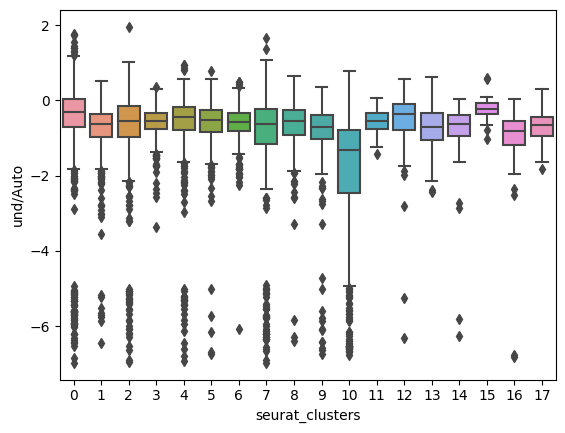

In [17]:
sns.boxplot(x='seurat_clusters', y='und/Auto', data=merged_all_norm_3)
#plt.hlines(np.median(merged_all_norm_3['S0/pseudo']),0,17,color="gray",linestyle='dashed')

<AxesSubplot:xlabel='seurat_clusters', ylabel='undefined'>

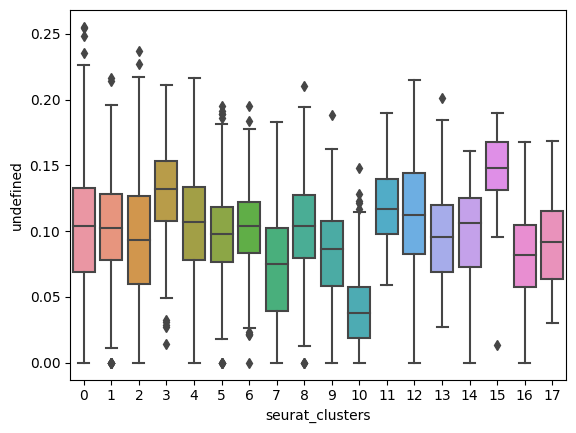

In [18]:
sns.boxplot(x='seurat_clusters', y='undefined', data=merged_all_norm_3)


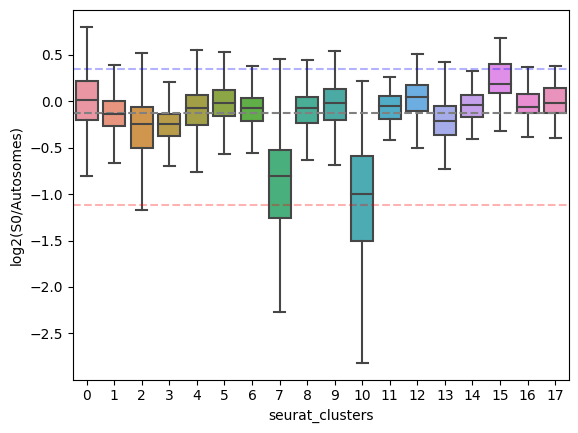

In [20]:
sns.boxplot(x='seurat_clusters', y='S0/Auto', data=merged_all_norm_3,showfliers=False)
plt.hlines(np.median(merged_all_norm_3['S0/Auto']),-0.5,17.5,color="gray",linestyle='dashed')
plt.hlines(np.percentile(merged_all_norm_3['S0/Auto'],5),-0.5,17.5,color="red",linestyle='dashed',alpha=0.3)
plt.hlines(np.percentile(merged_all_norm_3['S0/Auto'],95),-0.5,17.5,color="blue",linestyle='dashed',alpha=0.3)
plt.ylabel('log2(S0/Autosomes)',fontsize=10)
#plt.fill_between([-0.5,17.5], np.percentile(merged_all_norm_3['S0/Auto'],5),np.percentile(merged_all_norm_3['S0/Auto'],95), facecolor='lightblue', alpha=0.7)
plt.savefig('./paper_figures/S0_vs_Auto_mean.png',bbox_inches='tight')

Text(0, 0.5, 'log2(S0/Autosomes)')

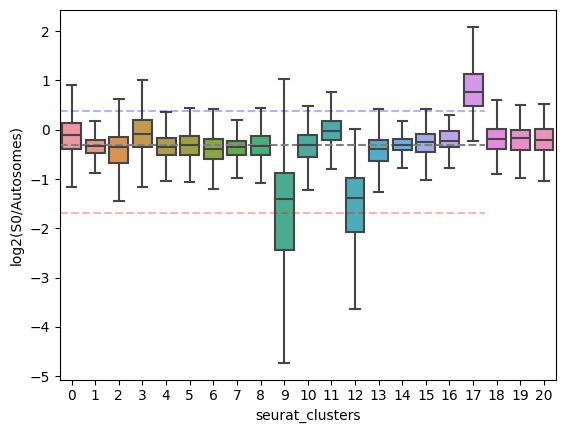

In [38]:
sns.boxplot(x='seurat_clusters', y='S0/Auto', data=merged_all_norm_3,showfliers=False)
plt.hlines(np.median(merged_all_norm_3['S0/Auto']),-0.5,17.5,color="gray",linestyle='dashed')
plt.hlines(np.percentile(merged_all_norm_3['S0/Auto'],5),-0.5,17.5,color="red",linestyle='dashed',alpha=0.3)
plt.hlines(np.percentile(merged_all_norm_3['S0/Auto'],95),-0.5,17.5,color="blue",linestyle='dashed',alpha=0.3)
plt.ylabel('log2(S0/Autosomes)',fontsize=10)
#plt.fill_between([-0.5,17.5], np.percentile(merged_all_norm_3['S0/Auto'],5),np.percentile(merged_all_norm_3['S0/Auto'],95), facecolor='lightblue', alpha=0.7)
#plt.savefig('./paper_figures/S0_vs_Auto_mean.png',bbox_inches='tight')

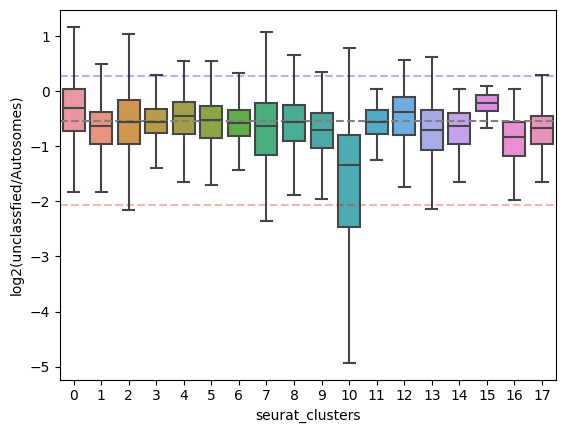

In [21]:
sns.boxplot(x='seurat_clusters', y='und/Auto', data=merged_all_norm_3,showfliers=False)
plt.hlines(np.median(merged_all_norm_3['und/Auto']),-0.5,17.5,color="gray",linestyle='dashed')
plt.hlines(np.percentile(merged_all_norm_3['und/Auto'],5),-0.5,17.5,color="red",linestyle='dashed',alpha=0.3)
plt.hlines(np.percentile(merged_all_norm_3['und/Auto'],95),-0.5,17.5,color="blue",linestyle='dashed',alpha=0.3)
plt.ylabel('log2(unclassfied/Autosomes)',fontsize=10)
#plt.fill_between([-0.5,17.5], np.percentile(merged_all_norm_3['S0/Auto'],5),np.percentile(merged_all_norm_3['S0/Auto'],95), facecolor='lightblue', alpha=0.7)
plt.savefig('./paper_figures/und_vs_Auto_mean.png',bbox_inches='tight')

Text(0, 0.5, 'log2(unclassfied/Autosomes)')

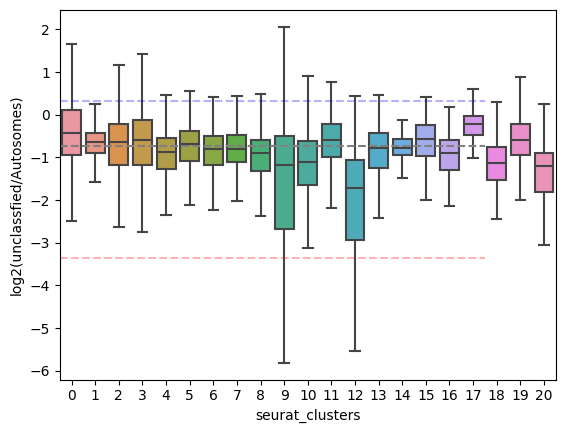

In [39]:
sns.boxplot(x='seurat_clusters', y='und/Auto', data=merged_all_norm_3,showfliers=False)
plt.hlines(np.median(merged_all_norm_3['und/Auto']),-0.5,17.5,color="gray",linestyle='dashed')
plt.hlines(np.percentile(merged_all_norm_3['und/Auto'],5),-0.5,17.5,color="red",linestyle='dashed',alpha=0.3)
plt.hlines(np.percentile(merged_all_norm_3['und/Auto'],95),-0.5,17.5,color="blue",linestyle='dashed',alpha=0.3)
plt.ylabel('log2(unclassfied/Autosomes)',fontsize=10)
#plt.fill_between([-0.5,17.5], np.percentile(merged_all_norm_3['S0/Auto'],5),np.percentile(merged_all_norm_3['S0/Auto'],95), facecolor='lightblue', alpha=0.7)
#plt.savefig('./paper_figures/und_vs_Auto_mean.png',bbox_inches='tight')

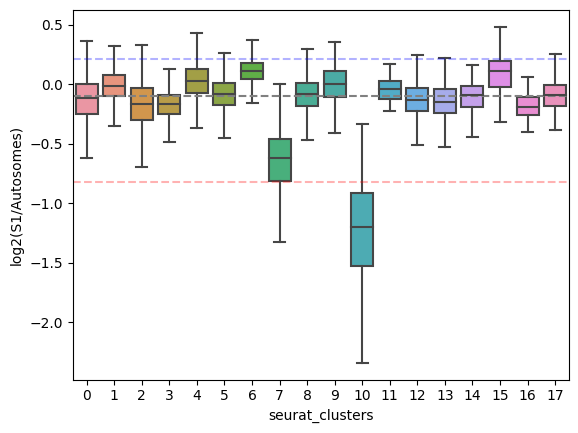

In [22]:
sns.boxplot(x='seurat_clusters', y='S1/Auto', data=merged_all_norm_3,showfliers=False)
plt.hlines(np.median(merged_all_norm_3['S1/Auto']),-0.5,17.5,color="gray",linestyle='dashed')
plt.hlines(np.percentile(merged_all_norm_3['S1/Auto'],5),-0.5,17.5,color="red",linestyle='dashed',alpha=0.3)
plt.hlines(np.percentile(merged_all_norm_3['S1/Auto'],95),-0.5,17.5,color="blue",linestyle='dashed',alpha=0.3)
plt.ylabel('log2(S1/Autosomes)',fontsize=10)
#plt.fill_between([-0.5,17.5], np.percentile(merged_all_norm_3['S0/Auto'],5),np.percentile(merged_all_norm_3['S0/Auto'],95), facecolor='lightblue', alpha=0.7)
plt.savefig('./paper_figures/S1_vs_Auto_mean.png',bbox_inches='tight')

Text(0, 0.5, 'log2(S1/Autosomes)')

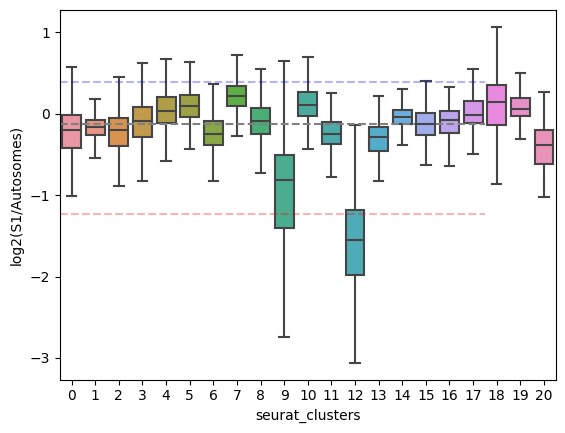

In [40]:
sns.boxplot(x='seurat_clusters', y='S1/Auto', data=merged_all_norm_3,showfliers=False)
plt.hlines(np.median(merged_all_norm_3['S1/Auto']),-0.5,17.5,color="gray",linestyle='dashed')
plt.hlines(np.percentile(merged_all_norm_3['S1/Auto'],5),-0.5,17.5,color="red",linestyle='dashed',alpha=0.3)
plt.hlines(np.percentile(merged_all_norm_3['S1/Auto'],95),-0.5,17.5,color="blue",linestyle='dashed',alpha=0.3)
plt.ylabel('log2(S1/Autosomes)',fontsize=10)
#plt.fill_between([-0.5,17.5], np.percentile(merged_all_norm_3['S0/Auto'],5),np.percentile(merged_all_norm_3['S0/Auto'],95), facecolor='lightblue', alpha=0.7)
#plt.savefig('./paper_figures/S1_vs_Auto_mean.png',bbox_inches='tight')

In [385]:
np.median(merged_all_norm_3[merged_all_norm_3['seurat_clusters']==7]['S1/Auto'])-np.median(merged_all_norm_3['S1/Auto'])

-0.5242494286779928

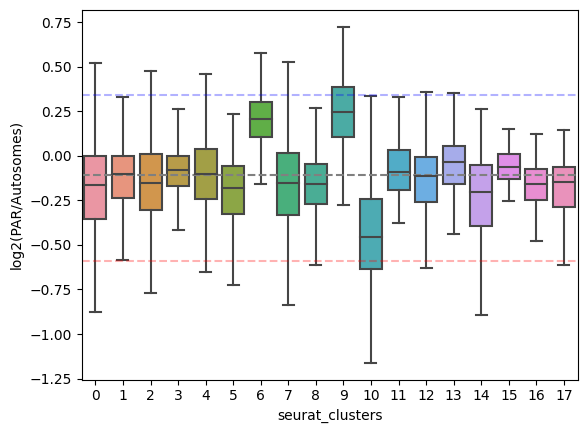

In [23]:
sns.boxplot(x='seurat_clusters', y='pseudo/Auto', data=merged_all_norm_3,showfliers=False)
plt.hlines(np.median(merged_all_norm_3['pseudo/Auto']),-0.5,17.5,color="gray",linestyle='dashed')
plt.hlines(np.percentile(merged_all_norm_3['pseudo/Auto'],5),-0.5,17.5,color="red",linestyle='dashed',alpha=0.3)
plt.hlines(np.percentile(merged_all_norm_3['pseudo/Auto'],95),-0.5,17.5,color="blue",linestyle='dashed',alpha=0.3)
plt.ylabel('log2(PAR/Autosomes)',fontsize=10)
#plt.fill_between([-0.5,17.5], np.percentile(merged_all_norm_3['S0/Auto'],5),np.percentile(merged_all_norm_3['S0/Auto'],95), facecolor='lightblue', alpha=0.7)
plt.savefig('./paper_figures/pseudo_vs_Auto_mean.png',bbox_inches='tight')

Text(0, 0.5, 'log2(PAR/Autosomes)')

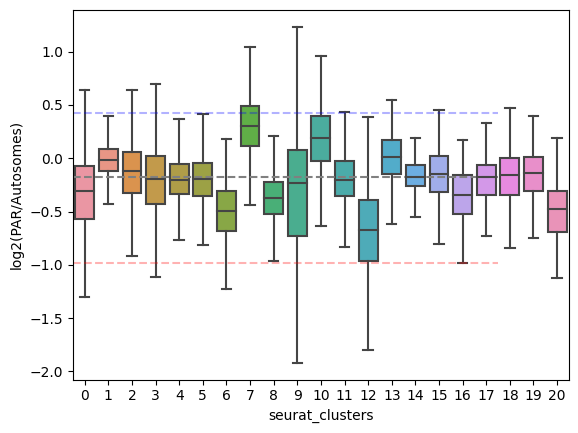

In [41]:
sns.boxplot(x='seurat_clusters', y='pseudo/Auto', data=merged_all_norm_3,showfliers=False)
plt.hlines(np.median(merged_all_norm_3['pseudo/Auto']),-0.5,17.5,color="gray",linestyle='dashed')
plt.hlines(np.percentile(merged_all_norm_3['pseudo/Auto'],5),-0.5,17.5,color="red",linestyle='dashed',alpha=0.3)
plt.hlines(np.percentile(merged_all_norm_3['pseudo/Auto'],95),-0.5,17.5,color="blue",linestyle='dashed',alpha=0.3)
plt.ylabel('log2(PAR/Autosomes)',fontsize=10)
#plt.fill_between([-0.5,17.5], np.percentile(merged_all_norm_3['S0/Auto'],5),np.percentile(merged_all_norm_3['S0/Auto'],95), facecolor='lightblue', alpha=0.7)
#plt.savefig('./paper_figures/pseudo_vs_Auto_mean.png',bbox_inches='tight')

In [531]:
exp_w_vs_merged_all_norm=pd.merge(merged_all_norm,exp_vs_w_2,left_on='gene',right_on='transcript')

In [530]:
exp_w_vs_merged_all_norm=exp_w_vs_merged_all_norm.drop([0,2,3,'gene','gene_id'],axis=1).groupby(["strata"]).sum().T.reset_index()

,gene,AACCTGATCTCACTCG-1,ATCCGTCCACTGGATT-1,GAATCACAGCCTCACG-1,CACAGGCGTAGGAGTC-1,TCTCAGCTCTGGTGGC-1,AGAACAAAGTTGTAAG-1,TCGTGGGAGCGTGCCT-1,ATGGAGGAGGTCCGAA-1,GCTTGGGTCGATTTCT-1,...,Tname,Tsize,Tstart,Tend,blockcount,blockSizes,qStarts,tStarts,metric,transcript
0,MSTRG.7607,0.000000,0.119708,0.000000,0.000000,0.000000,0.064295,0.000000,0.065999,0.000000,...,MSTRG.7607.1,299,152,299,1,"147,","100,","0,",0.095238,MSTRG.7607
1,MSTRG.9321,0.000000,0.041515,0.043134,0.000000,0.000000,0.064295,0.000000,0.000000,0.000000,...,MSTRG.9321.1,537,171,397,3,"110,91,24,","120,230,322,","140,251,342,",0.031111,MSTRG.9321
2,MSTRG.11003,0.000000,0.000000,1.766194,0.057729,0.176899,1.606320,0.288203,1.965753,0.198144,...,MSTRG.11003.1,3183,390,896,1,"506,","0,","2287,",0.031621,MSTRG.11003
3,MSTRG.11441,0.165234,0.041515,0.199169,0.260163,0.327159,0.000000,0.288203,0.435544,0.198144,...,MSTRG.11441.1,1190,110,377,1,"267,","0,","110,",0.000000,MSTRG.11441
4,MSTRG.11441,0.165234,0.041515,0.199169,0.260163,0.327159,0.000000,0.288203,0.435544,0.198144,...,MSTRG.11441.1,1190,369,1161,1,"792,","21,","29,",0.017677,MSTRG.11441
5,MSTRG.12473,0.000000,0.000000,0.043134,0.000000,0.000000,0.000000,0.000000,0.065999,0.070501,...,MSTRG.12473.1,466,206,460,1,"254,","0,","206,",0.019685,MSTRG.12473
6,MSTRG.13681,0.120743,0.909716,0.559228,0.810038,0.643458,0.691200,0.625122,0.704770,0.589733,...,MSTRG.13681.1,3663,0,330,2,"114,210,","0,114,","3333,3453,",0.095679,MSTRG.13681
7,MSTRG.14280,0.000000,0.041515,0.043134,0.057729,0.062509,0.064295,0.064669,0.127910,0.000000,...,MSTRG.14280.1,1295,0,1035,12,"72,101,210,40,97,52,63,32,59,32,84,139,","2,74,176,386,426,524,577,652,684,773,805,890,","260,335,436,654,697,794,846,920,953,1037,1072,...",0.099898,MSTRG.14280
8,MSTRG.14385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,MSTRG.14385.1,1003,9,482,3,"47,337,88,","2,50,387,","9,56,394,",0.057203,MSTRG.14385
9,MSTRG.16395,0.000000,0.000000,0.084484,1.581623,1.775338,0.000000,0.000000,0.000000,1.890781,...,MSTRG.16395.1,655,264,655,1,"391,","0,","264,",0.015345,MSTRG.16395


In [404]:
merged_all_norm_3.loc[
  merged_all_norm_3['S0/Auto']<=np.percentile(merged_all_norm_3['S0/Auto'],5), 
  'S0_expression'
] = 'low'
merged_all_norm_3.loc[
  ((merged_all_norm_3['S0/Auto']>np.percentile(merged_all_norm_3['S0/Auto'],5))), 
  'S0_expression'
] = 'high'

In [405]:
#merged_all_norm_3.loc[
#  merged_all_norm_3['S0/Auto']<=np.median(merged_all_norm_3['S0/Auto']), 
#  'S0_expression'
#] = 'low'
#merged_all_norm_3.loc[
#  ((merged_all_norm_3['S0/Auto']>np.median(merged_all_norm_3['S0/Auto']))), 
#  'S0_expression'
#] = 'high'

In [406]:
len(merged_all_norm_3[(merged_all_norm_3['seurat_clusters']==4)&(merged_all_norm_3['S0_expression']=='low')])

19

In [407]:
len(merged_all_norm_3[(merged_all_norm_3['seurat_clusters']==7)&(merged_all_norm_3['S0_expression']=='low')])/(len(merged_all_norm_3[(merged_all_norm_3['seurat_clusters']==7)&(merged_all_norm_3['S0_expression']=='low')])+len(merged_all_norm_3[(merged_all_norm_3['seurat_clusters']==7)&(merged_all_norm_3['S0_expression']=='high')]))

0.27973568281938327

In [126]:
merged_all_norm_3[(merged_all_norm_3['seurat_clusters']==10)&(merged_all_norm_3['S0_expression']=='high')]

,Unnamed: 0,barcodes,seurat_clusters,index,Autosomal,S0,S1,pseudo,S0/Auto,S1/Auto,pseudo/Auto,S0_expression
30,31,ATACCTTTCCATTCGC-1,10,ATACCTTTCCATTCGC-1,3324.521008,43.788621,90.877641,64.617566,0.013171,0.027336,0.019437,high
100,101,GTCACTCCATGGGTCC-1,10,GTCACTCCATGGGTCC-1,2705.190136,32.667812,58.273775,48.181479,0.012076,0.021541,0.017811,high
327,328,CTGGTCTAGCATTTGC-1,10,CTGGTCTAGCATTTGC-1,2672.473371,27.628040,70.703306,50.633959,0.010338,0.026456,0.018946,high
386,387,TTCCTCTTCATCACCC-1,10,TTCCTCTTCATCACCC-1,2789.767092,35.130999,73.047728,56.043031,0.012593,0.026184,0.020089,high
509,510,CGGTCAGTCGCCTTGT-1,10,CGGTCAGTCGCCTTGT-1,2280.679565,30.360901,55.746389,43.126691,0.013312,0.024443,0.018910,high
...,...,...,...,...,...,...,...,...,...,...,...,...
7034,7035,CTTAGGAGTCCCTAAA-1,10,CTTAGGAGTCCCTAAA-1,1586.308074,28.777149,25.557093,26.790888,0.018141,0.016111,0.016889,high
7045,7046,GATCGTAGTAAGGCTG-1,10,GATCGTAGTAAGGCTG-1,908.340188,16.849450,7.899958,5.923205,0.018550,0.008697,0.006521,high
7057,7058,TGCAGATTCGATCCAA-1,10,TGCAGATTCGATCCAA-1,1670.840758,19.047476,35.842840,26.827358,0.011400,0.021452,0.016056,high
7062,7063,CGTAAGTCACGTCATA-1,10,CGTAAGTCACGTCATA-1,1320.926357,18.213845,26.870194,33.184553,0.013789,0.020342,0.025122,high


In [117]:
cluster=10
len(merged_all_norm_3[(merged_all_norm_3['seurat_clusters']==cluster)&(merged_all_norm_3['S0_expression']=='low')])/(len(merged_all_norm_3[(merged_all_norm_3['seurat_clusters']==cluster)&(merged_all_norm_3['S0_expression']=='low')])+len(merged_all_norm_3[(merged_all_norm_3['seurat_clusters']==cluster)&(merged_all_norm_3['S0_expression']=='high')]))

0.4977578475336323

In [122]:
cluster=5
len(merged_all_norm_3[(merged_all_norm_3['seurat_clusters']==cluster)&(merged_all_norm_3['S0_expression']=='low')])/(len(merged_all_norm_3[(merged_all_norm_3['seurat_clusters']==cluster)&(merged_all_norm_3['S0_expression']=='low')])+len(merged_all_norm_3[(merged_all_norm_3['seurat_clusters']==cluster)&(merged_all_norm_3['S0_expression']=='high')]))

0.0034782608695652175

In [276]:
cluster_7_snps=pd.read_csv("cluster_7_snps_7082.txt",sep="\t")
cluster_10_snps=pd.read_csv("cluster_10_snps_7082.txt",sep="\t")
cluster_7_snps_LG6=pd.read_csv("cluster_7_snps_7082_LG6.txt",sep="\t")
cluster_10_snps_LG6=pd.read_csv("cluster_10_snps_7082_LG6.txt",sep="\t")
cluster_6_snps_LG6=pd.read_csv("cluster_6_snps_7082_LG6.txt",sep="\t")
cluster_3_snps_LG6=pd.read_csv("cluster_3_snps_7082_LG6.txt",sep="\t")
cluster_0_snps=pd.read_csv("cluster_0_snps_7082.txt",sep="\t")
cluster_1_snps=pd.read_csv("cluster_1_snps_7082.txt",sep="\t")
cluster_2_snps=pd.read_csv("cluster_2_snps_7082.txt",sep="\t")
cluster_3_snps=pd.read_csv("cluster_3_snps_7082.txt",sep="\t")
cluster_4_snps=pd.read_csv("cluster_4_snps_7082.txt",sep="\t")
cluster_5_snps=pd.read_csv("cluster_5_snps_7082.txt",sep="\t")
cluster_6_snps=pd.read_csv("cluster_6_snps_7082.txt",sep="\t")

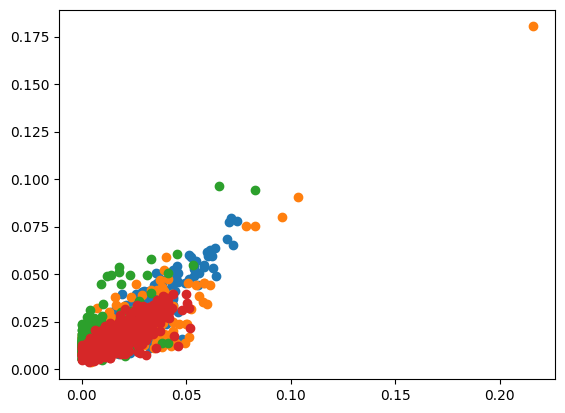

In [284]:
plt.scatter(cluster_6_snps_LG6['heterozygous']/(cluster_6_snps_LG6['heterozygous']+cluster_6_snps_LG6['homozygous']),cluster_6_snps['heterozygous']/(cluster_6_snps['heterozygous']+cluster_6_snps['homozygous']))
plt.scatter(cluster_7_snps_LG6['heterozygous']/(cluster_7_snps_LG6['heterozygous']+cluster_7_snps_LG6['homozygous']),cluster_7_snps['heterozygous']/(cluster_7_snps['heterozygous']+cluster_7_snps['homozygous']))
plt.scatter(cluster_10_snps_LG6['heterozygous']/(cluster_10_snps_LG6['heterozygous']+cluster_10_snps_LG6['homozygous']),cluster_10_snps['heterozygous']/(cluster_10_snps['heterozygous']+cluster_10_snps['homozygous']))
plt.scatter(cluster_3_snps_LG6['heterozygous']/(cluster_3_snps_LG6['heterozygous']+cluster_3_snps_LG6['homozygous']),cluster_3_snps['heterozygous']/(cluster_3_snps['heterozygous']+cluster_3_snps['homozygous']))


In [259]:
merged_all_norm_3['barcodes_merge']=merged_all_norm_3['barcodes'].str[:-2]

In [256]:
merged_all_norm_3_cluster_3_hetero=pd.merge(merged_all_norm_3,cluster_3_snps,left_on='barcodes_merge',right_on='barcodes')
merged_all_norm_3_cluster_7_hetero=pd.merge(merged_all_norm_3,cluster_7_snps,left_on='barcodes_merge',right_on='barcodes')
merged_all_norm_3_cluster_10_hetero=pd.merge(merged_all_norm_3,cluster_10_snps,left_on='barcodes_merge',right_on='barcodes')

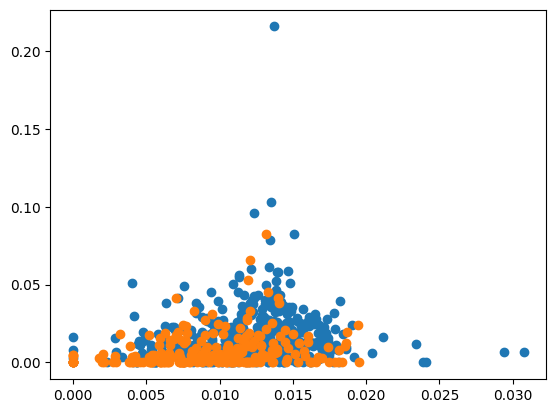

In [257]:
#plt.hist(merged_all_norm_3_cluster_7_hetero['S0/Auto'])
#plt.scatter(merged_all_norm_3_cluster_3_hetero['S0/Auto'],merged_all_norm_3_cluster_3_hetero['heterozygous']/(merged_all_norm_3_cluster_3_hetero['heterozygous']+merged_all_norm_3_cluster_3_hetero['homozygous']))
plt.scatter(merged_all_norm_3_cluster_7_hetero['S0/Auto'],merged_all_norm_3_cluster_7_hetero['heterozygous']/(merged_all_norm_3_cluster_7_hetero['heterozygous']+merged_all_norm_3_cluster_7_hetero['homozygous']))
plt.scatter(merged_all_norm_3_cluster_10_hetero['S0/Auto'],merged_all_norm_3_cluster_10_hetero['heterozygous']/(merged_all_norm_3_cluster_10_hetero['heterozygous']+merged_all_norm_3_cluster_10_hetero['homozygous']))

In [465]:
normalized_exp

,gene,AACCTGATCTCACTCG-1,ATCCGTCCACTGGATT-1,GAATCACAGCCTCACG-1,CACAGGCGTAGGAGTC-1,TCTCAGCTCTGGTGGC-1,AGAACAAAGTTGTAAG-1,TCGTGGGAGCGTGCCT-1,ATGGAGGAGGTCCGAA-1,GCTTGGGTCGATTTCT-1,...,ACATCGAGTTCGTAAC-1,GTCTCACAGGAAGTCC-1,TCGCAGGGTGAGTTGG-1,CGTGAATCACGGCCAT-1,AGTTAGCCAGAAATCA-1,TGAGGTTAGCCTGAGA-1,GTAGAAACAACAGATA-1,CCATAAGTCAATCAGC-1,CATGCGGGTGTCGCTG-1,AGGATAAAGGATGCGT-1
0,MSTRG.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,MSTRG.2,0.025343,0.156624,0.199169,0.000000,0.121339,0.000000,0.236827,0.127910,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,MSTRG.3,0.000000,0.382728,0.365183,0.347835,0.229535,0.181673,0.383655,0.293510,0.198144,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,MSTRG.4,0.000000,1.942598,2.738094,0.000000,0.000000,1.831969,0.000000,2.187639,0.000000,...,0.0,0.0,2.300652,0.0,0.0,3.461483,0.0,0.0,0.0,0.0
4,MSTRG.5,0.000000,0.000000,0.043134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32577,MSTRG.32605,0.050060,0.156624,0.124192,0.112307,0.176899,0.181673,0.064669,0.000000,0.070501,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
32578,MSTRG.32606,0.000000,0.041515,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
32579,MSTRG.32607,0.000000,0.000000,0.043134,0.000000,0.000000,0.000000,0.064669,0.000000,0.070501,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
32580,MSTRG.32608,0.414320,0.000000,0.000000,0.304959,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [475]:
normalized_exp_2=normalized_exp.set_index('gene').T.rename_axis('barcode').reset_index()

In [492]:
normalized_with_clusters=pd.merge(seurat_clusters,normalized_exp_2,left_on='barcodes',right_on='barcode')

In [501]:
normalized_with_clusters[normalized_with_clusters['seurat_clusters']==7][['MSTRG.3369','MSTRG.8441','MSTRG.8597','MSTRG.14141','MSTRG.21677','MSTRG.20328','MSTRG.24314']].corr(method='spearman')

,MSTRG.3369,MSTRG.8441,MSTRG.8597,MSTRG.14141,MSTRG.21677,MSTRG.20328,MSTRG.24314
MSTRG.3369,1.000000,0.102625,0.146575,0.171140,0.042567,0.132000,0.126298
MSTRG.8441,0.102625,1.000000,0.170849,0.111085,0.059797,0.089272,0.003592
MSTRG.8597,0.146575,0.170849,1.000000,0.095827,0.040058,0.097758,0.049568
MSTRG.14141,0.171140,0.111085,0.095827,1.000000,0.068439,0.160800,0.056887
MSTRG.21677,0.042567,0.059797,0.040058,0.068439,1.000000,0.070125,-0.037406
MSTRG.20328,0.132000,0.089272,0.097758,0.160800,0.070125,1.000000,0.043159
MSTRG.24314,0.126298,0.003592,0.049568,0.056887,-0.037406,0.043159,1.000000


In [519]:
normalized_with_clusters[(normalized_with_clusters[gene1]>np.percentile(normalized_with_clusters[gene1],80))&(normalized_with_clusters[gene2]>np.percentile(normalized_with_clusters[gene2],80))&(normalized_with_clusters[gene3]>np.percentile(normalized_with_clusters[gene3],80))&(normalized_with_clusters[gene4]>np.percentile(normalized_with_clusters[gene4],80))&(normalized_with_clusters[gene5]>np.percentile(normalized_with_clusters[gene5],80))]

,Unnamed: 0,barcodes,seurat_clusters,barcode,MSTRG.1,MSTRG.2,MSTRG.3,MSTRG.4,MSTRG.5,MSTRG.6,...,MSTRG.32600,MSTRG.32601,MSTRG.32602,MSTRG.32603,MSTRG.32604,MSTRG.32605,MSTRG.32606,MSTRG.32607,MSTRG.32608,MSTRG.32609
99,100,TTACCGCTCCGTAGGC-1,3,TTACCGCTCCGTAGGC-1,0.0,0.000000,0.995418,0.00000,0.0,0.0,...,0.000000,0.250221,0.250221,0.0,0.000000,0.250221,0.000000,0.0,0.000000,0.000000
103,104,CCATCACTCTTTGATC-1,7,CCATCACTCTTTGATC-1,0.0,0.000000,0.000000,0.00000,0.0,0.0,...,0.248328,0.000000,0.000000,0.0,0.248328,0.000000,0.000000,0.0,0.612827,0.447094
321,322,GTGTTAGCACACCGCA-1,3,GTGTTAGCACACCGCA-1,0.0,0.000000,0.000000,0.00000,0.0,0.0,...,0.364512,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
394,395,CCGTAGGAGTTCCTGA-1,3,CCGTAGGAGTTCCTGA-1,0.0,0.000000,0.675786,0.00000,0.0,0.0,...,0.393924,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
406,407,CACAGATCAGAGGTAC-1,3,CACAGATCAGAGGTAC-1,0.0,0.000000,0.904427,0.00000,0.0,0.0,...,0.000000,0.000000,0.398892,0.0,0.000000,0.398892,0.000000,0.0,0.000000,0.000000
733,734,CATCGCTCAGAGAGGG-1,3,CATCGCTCAGAGAGGG-1,0.0,0.501150,0.833446,0.00000,0.0,0.0,...,0.501150,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
946,947,CTTACCGTCCCTCGTA-1,7,CTTACCGTCCCTCGTA-1,0.0,0.000000,0.000000,0.00000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.604248,0.000000
1252,1253,ATAGGCTTCTAACGCA-1,7,ATAGGCTTCTAACGCA-1,0.0,0.000000,0.000000,0.00000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.716006
1329,1330,TCGACCTAGTATGGCG-1,7,TCGACCTAGTATGGCG-1,0.0,0.000000,0.000000,0.00000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.769529,0.000000
1331,1332,ATACCTTCAGGTTCAT-1,12,ATACCTTCAGGTTCAT-1,0.0,0.000000,1.154073,0.00000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.735028,0.000000,0.000000,0.0,0.000000,0.735028


In [502]:
normalized_with_clusters[(normalized_with_clusters['MSTRG.11874']>np.percentile(normalized_with_clusters['MSTRG.11874'],90))&(normalized_with_clusters['MSTRG.8484']>np.percentile(normalized_with_clusters['MSTRG.8484'],90))&(normalized_with_clusters['MSTRG.12415']>np.percentile(normalized_with_clusters['MSTRG.12415'],90))&(normalized_with_clusters['MSTRG.30048']>np.percentile(normalized_with_clusters['MSTRG.30048'],90))&(normalized_with_clusters['MSTRG.11963']>np.percentile(normalized_with_clusters['MSTRG.11963'],90))]

,Unnamed: 0,barcodes,seurat_clusters,barcode,MSTRG.1,MSTRG.2,MSTRG.3,MSTRG.4,MSTRG.5,MSTRG.6,...,MSTRG.32600,MSTRG.32601,MSTRG.32602,MSTRG.32603,MSTRG.32604,MSTRG.32605,MSTRG.32606,MSTRG.32607,MSTRG.32608,MSTRG.32609
0,1,AACCTGATCTCACTCG-1,7,AACCTGATCTCACTCG-1,0.0,0.025343,0.0,0.0,0.0,0.000000,...,0.447679,0.0,0.0,0.0,0.097733,0.050060,0.0,0.0,0.414320,0.143236
41,42,GCGGATCCACTAAACC-1,7,GCGGATCCACTAAACC-1,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.306367,0.0,0.0,0.0,0.164870,0.306367,0.0,0.0,0.164870,0.164870
90,91,ACGATGTCAACGGGTA-1,7,ACGATGTCAACGGGTA-1,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.596230,0.0,0.0,0.0,0.000000,0.240397,0.0,0.0,0.000000,0.240397
103,104,CCATCACTCTTTGATC-1,7,CCATCACTCTTTGATC-1,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.248328,0.0,0.0,0.0,0.248328,0.000000,0.0,0.0,0.612827,0.447094
408,409,TCTATCACACTTGACA-1,7,TCTATCACACTTGACA-1,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.409659,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.409659
513,514,GGGCTCATCAGCTGAT-1,7,GGGCTCATCAGCTGAT-1,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.454031,0.000000
646,647,CCTACGTGTTAGTTCG-1,7,CCTACGTGTTAGTTCG-1,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
807,808,GTAACACCATATGAAG-1,7,GTAACACCATATGAAG-1,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.522701,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.522701,0.000000
820,821,TATCCTACATCGCTGG-1,7,TATCCTACATCGCTGG-1,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.905113,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1252,1253,ATAGGCTTCTAACGCA-1,7,ATAGGCTTCTAACGCA-1,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.716006


In [488]:
pd.merge(seurat_clusters,normalized_exp_2[(normalized_exp_2['MSTRG.11874']>np.percentile(normalized_exp_2['MSTRG.11874'],90))&(normalized_exp_2['MSTRG.8484']>np.percentile(normalized_exp_2['MSTRG.8484'],90))&(normalized_exp_2['MSTRG.12415']>np.percentile(normalized_exp_2['MSTRG.12415'],90))&(normalized_exp_2['MSTRG.30048']>np.percentile(normalized_exp_2['MSTRG.30048'],90))&(normalized_exp_2['MSTRG.11963']>np.percentile(normalized_exp_2['MSTRG.11963'],90))],left_on='barcodes',right_on='barcode')

,Unnamed: 0,barcodes,seurat_clusters,barcode,MSTRG.1,MSTRG.2,MSTRG.3,MSTRG.4,MSTRG.5,MSTRG.6,...,MSTRG.32600,MSTRG.32601,MSTRG.32602,MSTRG.32603,MSTRG.32604,MSTRG.32605,MSTRG.32606,MSTRG.32607,MSTRG.32608,MSTRG.32609
0,1,AACCTGATCTCACTCG-1,7,AACCTGATCTCACTCG-1,0.0,0.025343,0.0,0.0,0.0,0.000000,...,0.447679,0.0,0.0,0.0,0.097733,0.050060,0.0,0.0,0.414320,0.143236
1,42,GCGGATCCACTAAACC-1,7,GCGGATCCACTAAACC-1,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.306367,0.0,0.0,0.0,0.164870,0.306367,0.0,0.0,0.164870,0.164870
2,91,ACGATGTCAACGGGTA-1,7,ACGATGTCAACGGGTA-1,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.596230,0.0,0.0,0.0,0.000000,0.240397,0.0,0.0,0.000000,0.240397
3,104,CCATCACTCTTTGATC-1,7,CCATCACTCTTTGATC-1,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.248328,0.0,0.0,0.0,0.248328,0.000000,0.0,0.0,0.612827,0.447094
4,409,TCTATCACACTTGACA-1,7,TCTATCACACTTGACA-1,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.409659,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.409659
5,514,GGGCTCATCAGCTGAT-1,7,GGGCTCATCAGCTGAT-1,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.454031,0.000000
6,647,CCTACGTGTTAGTTCG-1,7,CCTACGTGTTAGTTCG-1,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
7,808,GTAACACCATATGAAG-1,7,GTAACACCATATGAAG-1,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.522701,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.522701,0.000000
8,821,TATCCTACATCGCTGG-1,7,TATCCTACATCGCTGG-1,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.905113,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
9,1253,ATAGGCTTCTAACGCA-1,7,ATAGGCTTCTAACGCA-1,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.716006


In [463]:
normalized_exp[normalized_exp['gene']=='MSTRG.30948'].T.reset_index().iloc[1:][(normalized_exp[normalized_exp['gene']=='MSTRG.30948'].T.reset_index().iloc[1:][30924]>np.percentile((normalized_exp[normalized_exp['gene']=='MSTRG.30948'].T.reset_index().iloc[1:][30924]),95))]

,index,30924
1,AACCTGATCTCACTCG-1,1.478886
42,GCGGATCCACTAAACC-1,1.907421
74,GCTACAAAGGAGGCAG-1,2.46069
122,CCCATTGAGCGTGCCT-1,1.835752
150,ATTCAGGAGGTCACAG-1,1.928872
...,...,...
7018,GGTGTCGTCGTAGTCA-1,2.225449
7024,AGGATAAGTAACCAGG-1,1.916002
7027,GCAACCGAGAATTGTG-1,2.856093
7038,TCGAACAGTGTCCCTT-1,2.805053


In [443]:
np.percentile(,5)

TypeError: '<' not supported between instances of 'float' and 'str'

In [563]:
female_cov_fran

,0,1,2,3
0,scaffold231_size209697_1,1,10000,0.0000
1,scaffold231_size209697_1,10001,20000,0.0000
2,scaffold231_size209697_1,20001,30000,0.0000
3,scaffold231_size209697_1,30001,40000,0.0000
4,scaffold231_size209697_1,40001,50000,0.0000
...,...,...,...,...
90918,JAGUUB010013293.1_Artemia_franciscana_isolate_...,30001,40000,37.0816
90919,JAGUUB010013293.1_Artemia_franciscana_isolate_...,40001,50000,41.6558
90920,JAGUUB010013293.1_Artemia_franciscana_isolate_...,50001,60000,17.6274
90921,JAGUUB010013293.1_Artemia_franciscana_isolate_...,60001,70000,24.1416


In [564]:
male_cov_fran=pd.read_csv("CC2U_6_window",sep="\t",header=None)
female_cov_fran=pd.read_csv("CC2U_7_window",sep="\t",header=None)
#merged_cov=pd.merge(male_cov_fran,female_cov_fran,left_on=0,right_on=0)
merged_cov_fran=male_cov_fran

In [571]:
merged_cov_fran['female/male']=np.log2((female_cov_fran[3]+0.01)/(male_cov_fran[3]+0.01))

In [575]:
merged_cov_fran_2=merged_cov_fran[merged_cov_fran[0]=='LG6']

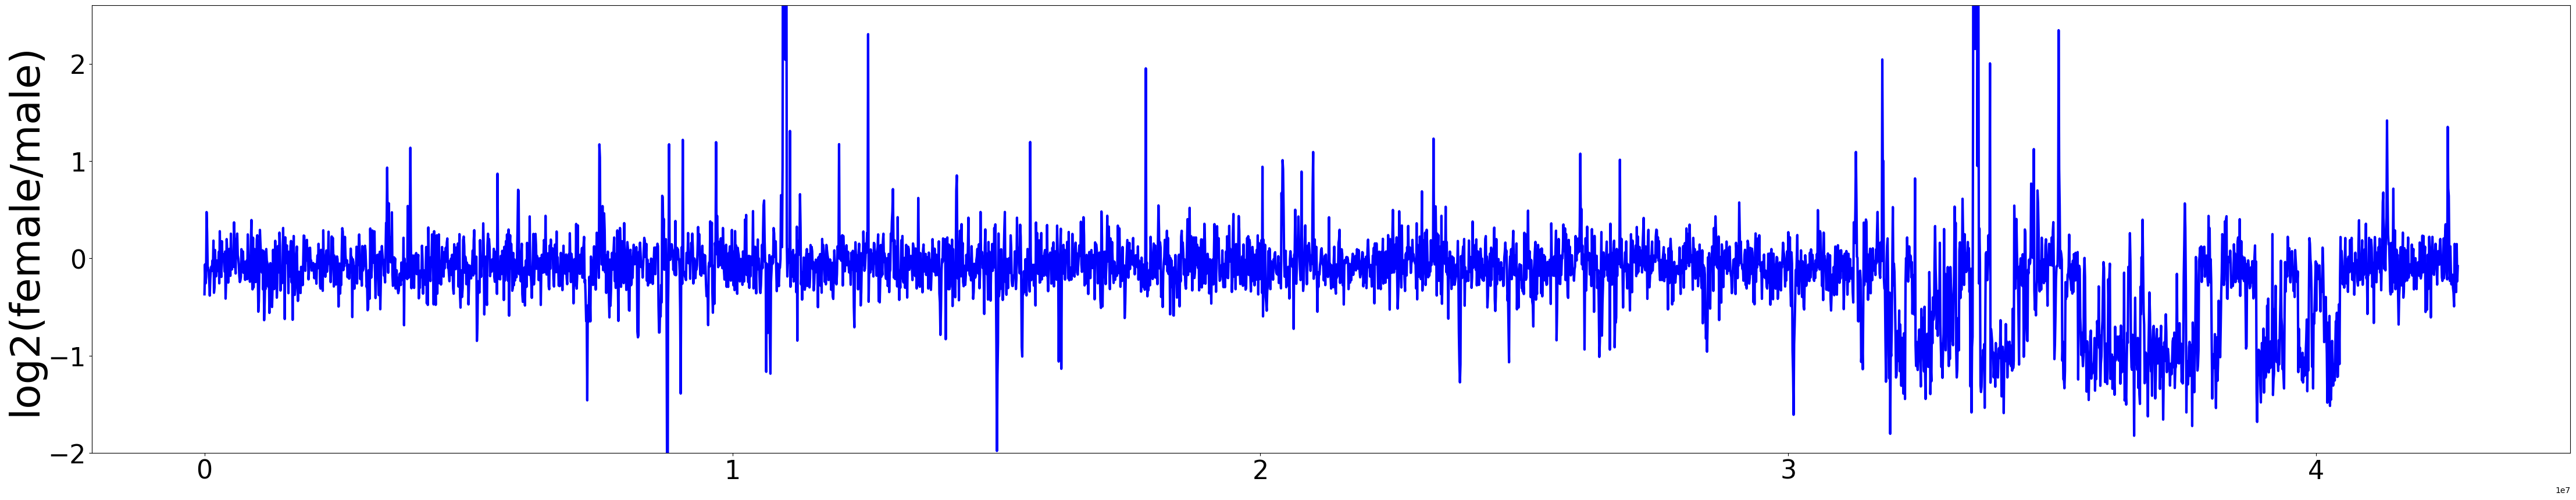

In [613]:
fig = plt.figure(figsize=(55,10))
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.ylim(ymax=2.6,ymin=-2)
plt.ylabel('log2(female/male)',fontsize=50)
plt.plot(merged_cov_fran_2[1],merged_cov_fran_2['female/male'],color='blue',linewidth=3,label='A. Kazakh')
plt.savefig('./paper_figures/coverage.png',bbox_inches='tight')

In [ ]:
'MSTRG.30948','MSTRG.607','MSTRG.30719','MSTRG.24825','MSTRG.31822','MSTRG.4048','MSTRG.8373','MSTRG.8081','MSTRG.22546','MSTRG.30004','MSTRG.8196','MSTRG.14141','MSTRG.21677','MSTRG.20328','MSTRG.24314','MSTRG.10116','MSTRG.24066','MSTRG.20861',
'MSTRG.14692',
'MSTRG.11874',
'MSTRG.8484',
'MSTRG.12415',
'MSTRG.30048',
'MSTRG.11963'

In [46]:
panorpa_cov=pd.read_csv("FemaleMale.soapfinal",sep="\s+",header=None)

In [75]:
panorpa_cov

,0,1,2,3,4
0,C1,200,150.0,200,190.0
1,C100003,372,300.0,372,320.0
2,C100005,372,87.0,372,NaN
3,C100007,372,66.0,372,71.0
4,C100009,372,79.0,372,240.0
...,...,...,...,...,...
118192,scaffold_86_RagTag,500,5700.0,500,6400.0
118193,scaffold_881_RagTag,4195,3400.0,4195,4000.0
118194,scaffold_8_RagTag,14772142,270.0,14772142,360.0
118195,scaffold_93_RagTag,386,940.0,386,1100.0


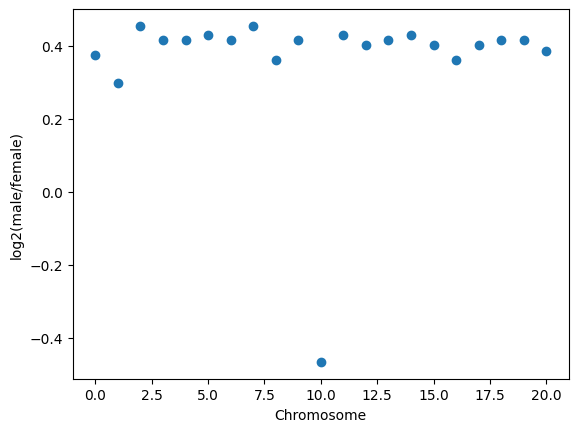

In [82]:
plt.scatter(np.arange(0,21,1),np.log2((panorpa_cov[(panorpa_cov[0].str.contains('RagTag'))&(panorpa_cov[1]>0.7*10**6)][4]+0.001)/(panorpa_cov[(panorpa_cov[0].str.contains('RagTag'))&(panorpa_cov[1]>0.7*10**6)][2]+0.001)))
plt.ylabel('log2(male/female)',fontsize=10)
plt.xlabel('Chromosome',fontsize=10)
plt.savefig('coverage.png',bbox_inches='tight')

In [65]:
len(panorpa_cov[(panorpa_cov[0].str.contains('RagTag'))&(panorpa_cov[1]>0.7*10**6)][4])

21

In [84]:
panorpa_cov['log2fsm']=np.log2((panorpa_cov[(panorpa_cov[0].str.contains('RagTag'))&(panorpa_cov[1]>0.7*10**6)][4]+0.001)/(panorpa_cov[(panorpa_cov[0].str.contains('RagTag'))&(panorpa_cov[1]>0.7*10**6)][2]+0.001))

In [85]:
panorpa_cov[(panorpa_cov[0].str.contains('RagTag'))&(panorpa_cov[1]>0.7*10**6)]

,0,1,2,3,4,log2fsm
118102,scaffold_10_RagTag,9072531,270.0,9072531,350.0,0.374394
118107,scaffold_11_RagTag,1001438,350.0,1001438,430.0,0.296981
118109,scaffold_12_RagTag,12827355,270.0,12827355,370.0,0.454564
118112,scaffold_13_RagTag,12483711,270.0,12483711,360.0,0.415036
118113,scaffold_14_RagTag,12543846,270.0,12543846,360.0,0.415036
118116,scaffold_15_RagTag,12065082,260.0,12065082,350.0,0.428842
118118,scaffold_16_RagTag,11377703,270.0,11377703,360.0,0.415036
118121,scaffold_17_RagTag,10253265,270.0,10253265,370.0,0.454564
118124,scaffold_18_RagTag,11805160,280.0,11805160,360.0,0.362569
118127,scaffold_19_RagTag,10919871,270.0,10919871,360.0,0.415036
